In [1]:
# Load and display dataset
import pandas as pd

data = pd.read_csv('fraud_oracle.csv')
display(data)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [2]:
# Data types of columns
data.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [3]:
# Checking for missing values

num_missing = data.isnull().sum()
num_missing

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [4]:
# Check for duplicates

num_duplicates = data.duplicated().sum()
num_duplicates

0

There are no missing or duplicated values in the dataset so no further actions are needed.

In [18]:
fraud_distribution = data['FraudFound_P'].value_counts()
fraud_distribution[0] / (fraud_distribution[0] + fraud_distribution[1])

0.9401426718547341

Approximately 94% of claims are non fraudulent, approximately 6% are fraudulent.

In [5]:
# Summary statistics for both types of data
numerical_summary = data.describe()
categorical_summary = data.describe(include=['object'])

display(numerical_summary.T)
display(categorical_summary.T)

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


,count,unique,top,freq
Month,15420,12,Jan,1411
DayOfWeek,15420,7,Monday,2616
Make,15420,19,Pontiac,3837
AccidentArea,15420,2,Urban,13822
DayOfWeekClaimed,15420,8,Monday,3757
MonthClaimed,15420,13,Jan,1446
Sex,15420,2,Male,13000
MaritalStatus,15420,4,Married,10625
Fault,15420,2,Policy Holder,11230
PolicyType,15420,9,Sedan - Collision,5584


### Feature Descriptions (Assumed)

• Month: The month the event occured.

• WeekOfMonth: The week of the month the event occured.

• DayOfWeek: The day of the week the event occured.

• Make: Vehicle make.

• AccidentArea: Area where the accident occurred (urban or rural).

• DayOfWeekClaimed: Day of the week when the claim was claimed.

• MonthClaimed: Month when the claim was claimed.

• WeekOfMonthClaimed: Week of the month when the claim was claimed.

• Sex: Sex of the policyholder.

• MaritalStatus: Marital status of the policyholder.

• Age: Age of the policyholder.

• Fault: Indicates whether the policyholder was at fault.

• PolicyType: Type of policy.

• VehicleCategory: Category of the vehicle.

• VehiclePrice: Price range of the vehicle.

• PolicyNumber: Unique policy number (index).

• RepNumber: Report number.

• Deductible: Deductible amount.

• DriverRating: Rating of the driver.

• Days Policy Accident: Number of days between policy start and accident.

• Days Policy Claim: Number of days between policy start and claim.

• PastNumberOfClaims: Number of past claims.

• AgeOfVehicle: Age of the vehicle.

• AgeOfPolicyHolder: Age of the policyholder.

• PoliceReportFiled: Indicates whether a police report was filed (yes or no).

• WitnessPresent: Indicates whether a witness was present (yes or no).

• AgentType: Type of agent (external or internal).

• NumberOfSuppliments: Number of supplements.

• AddressChange Claim: Number of months since last address change.

• NumberOfCars: Number of cars.

• Year: Year of the claim.

• BasePolicy: Type of base policy.

• FraudFound_P: Indicator of whether fraud was found (target variable) (binary).

### Analysis of Features

In the following section I will compare each features to our target variable to get a general idea of how they are correlated.

#### Month, WeekOfMonth, DayOfWeek:
• Month: The month the event occured.
• WeekOfMonth: The week of the month the event occured.
• DayOfWeek: The day of the week the event occured.

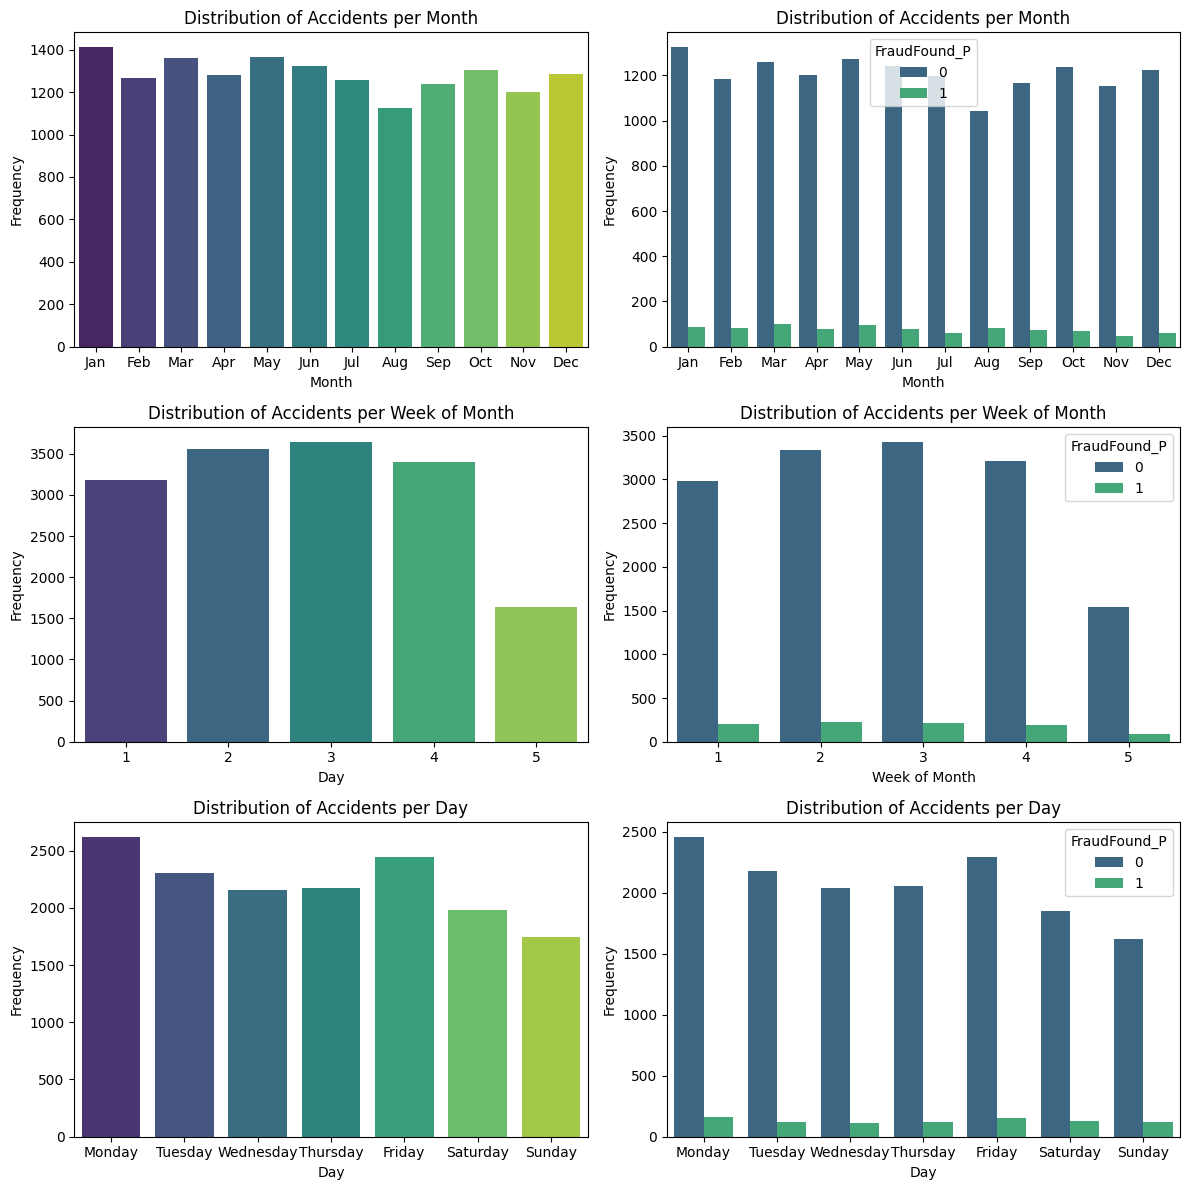

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
sns.countplot(x='Month', data=data, palette='viridis', order=month_order)
plt.title('Distribution of Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
sns.countplot(x='Month', data=data, palette='viridis', order=month_order, hue='FraudFound_P')
plt.title('Distribution of Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Frequency')

plt.subplot(3, 2, 3)
sns.countplot(x='WeekOfMonth', data=data, palette='viridis')
plt.title('Distribution of Accidents per Week of Month')
plt.xlabel('Day')
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
sns.countplot(x='WeekOfMonth', data=data, palette='viridis', hue='FraudFound_P')
plt.title('Distribution of Accidents per Week of Month')
plt.xlabel('Week of Month')
plt.ylabel('Frequency')

plt.subplot(3, 2, 5)
sns.countplot(x='DayOfWeek', data=data, palette='viridis', order=day_order)
plt.title('Distribution of Accidents per Day')
plt.xlabel('Day')
plt.ylabel('Frequency')

plt.subplot(3, 2, 6)
sns.countplot(x='DayOfWeek', data=data, palette='viridis', order=day_order, hue='FraudFound_P')
plt.title('Distribution of Accidents per Day')
plt.xlabel('Day')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Month, WeekOfMonth, DayOfWeek Conclusions:

Monthly Distribution:
Accidents are fairly evenly distributed throughout the year. Fraudulent claims remain mostly consistent across all months.

Weekly Distribution:
Data seems to follow according to the proportion of the size of each week so no significant pattern. Fraudulent claims follow a similar pattern across all weeks.

Daily Distribution:
Higher number of accidents on weekdays and fewer on weekends. Fraudulent claims follow a similar pattern.

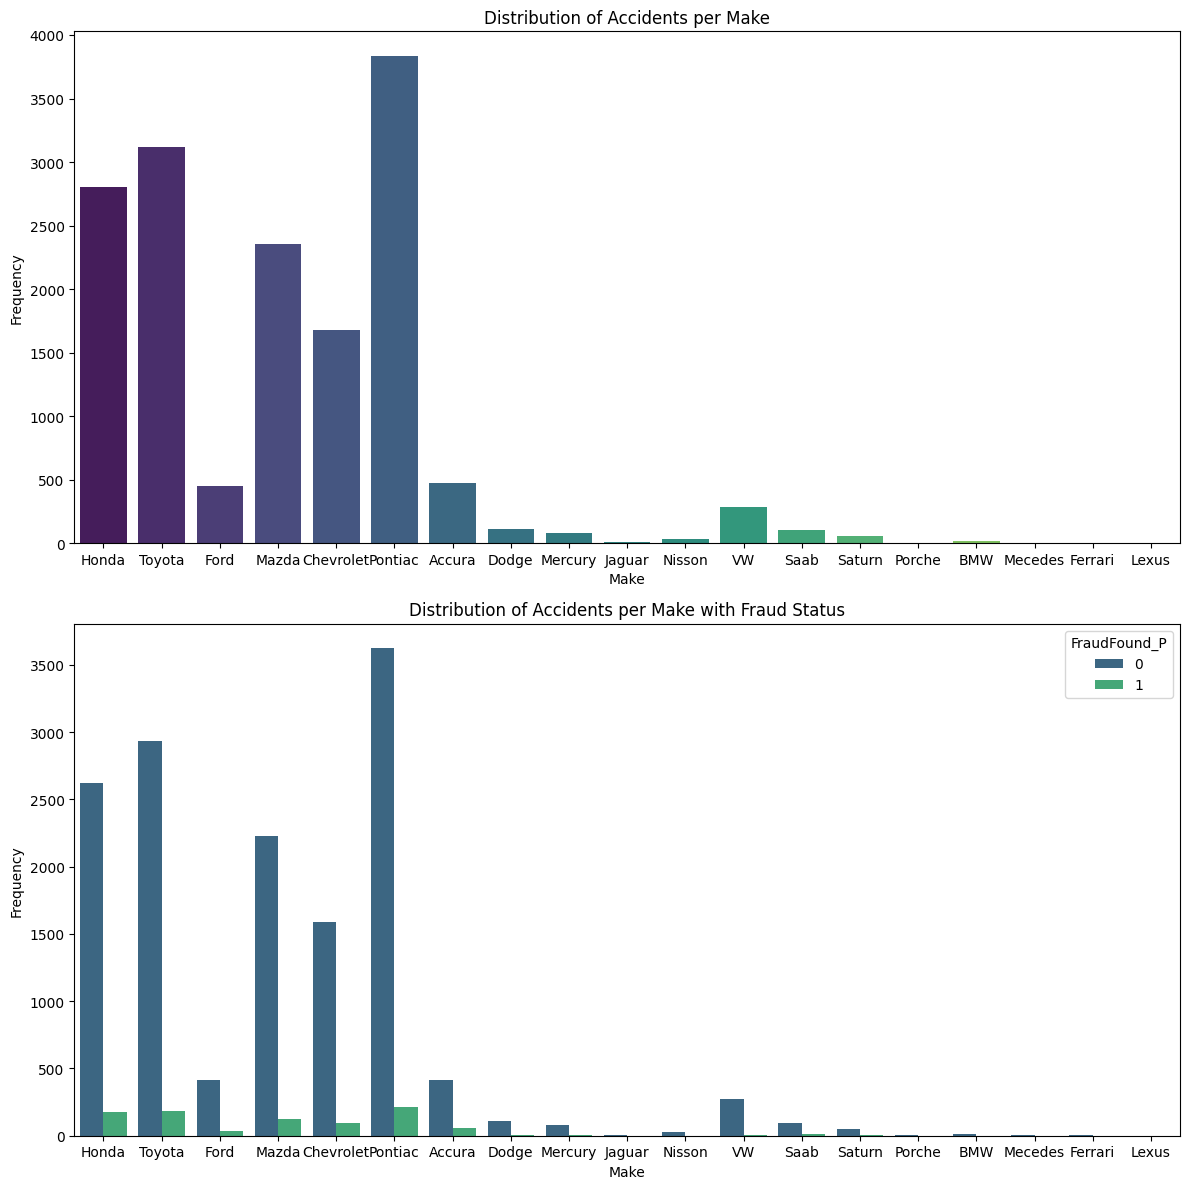

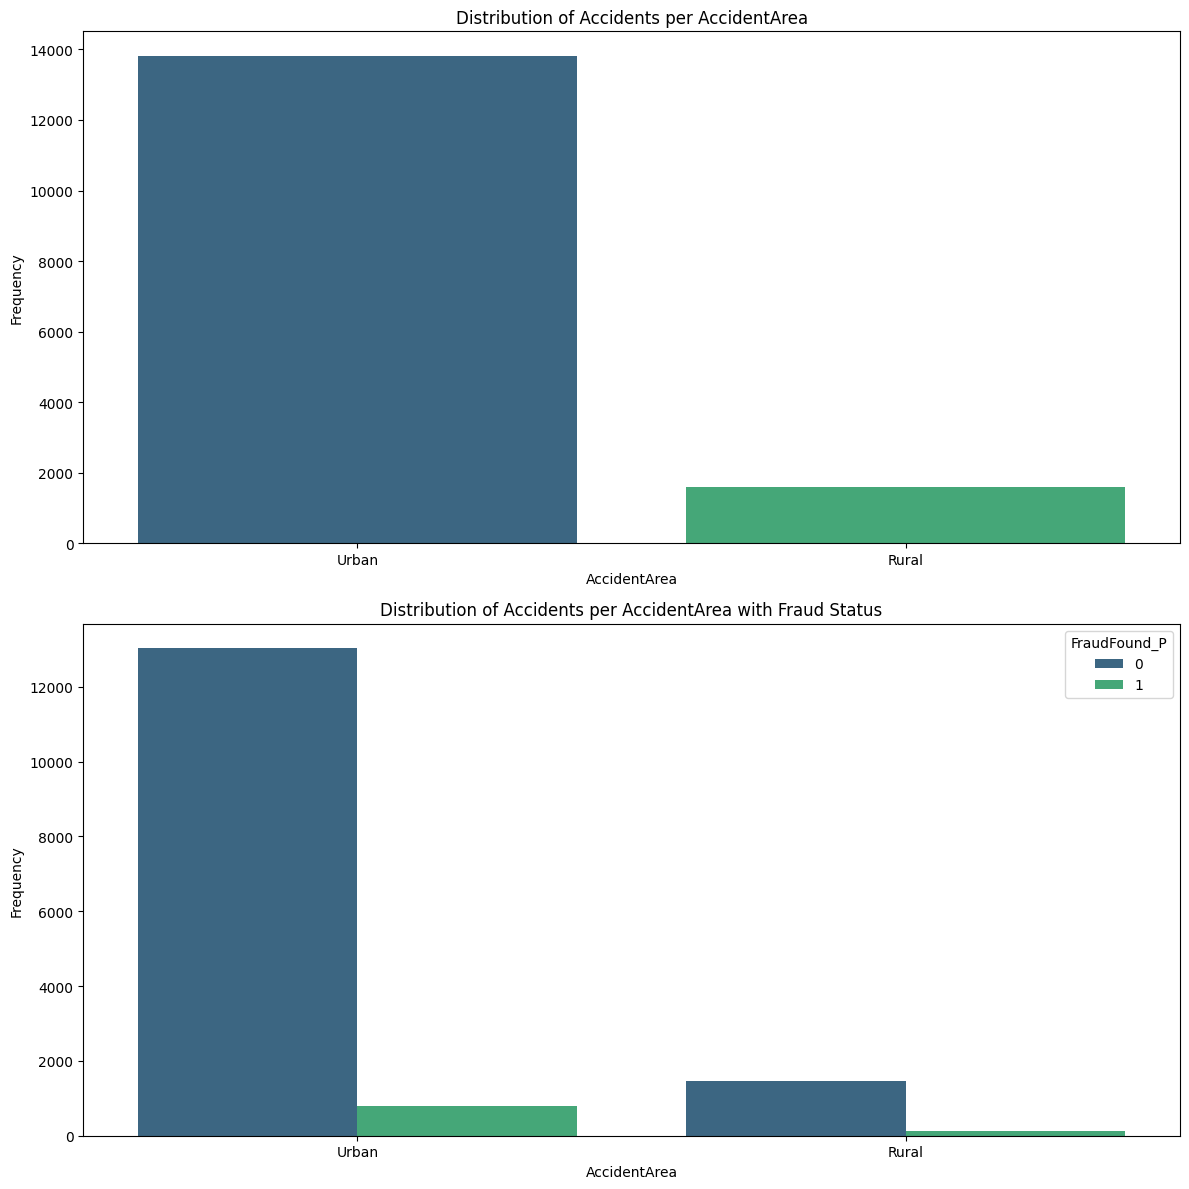

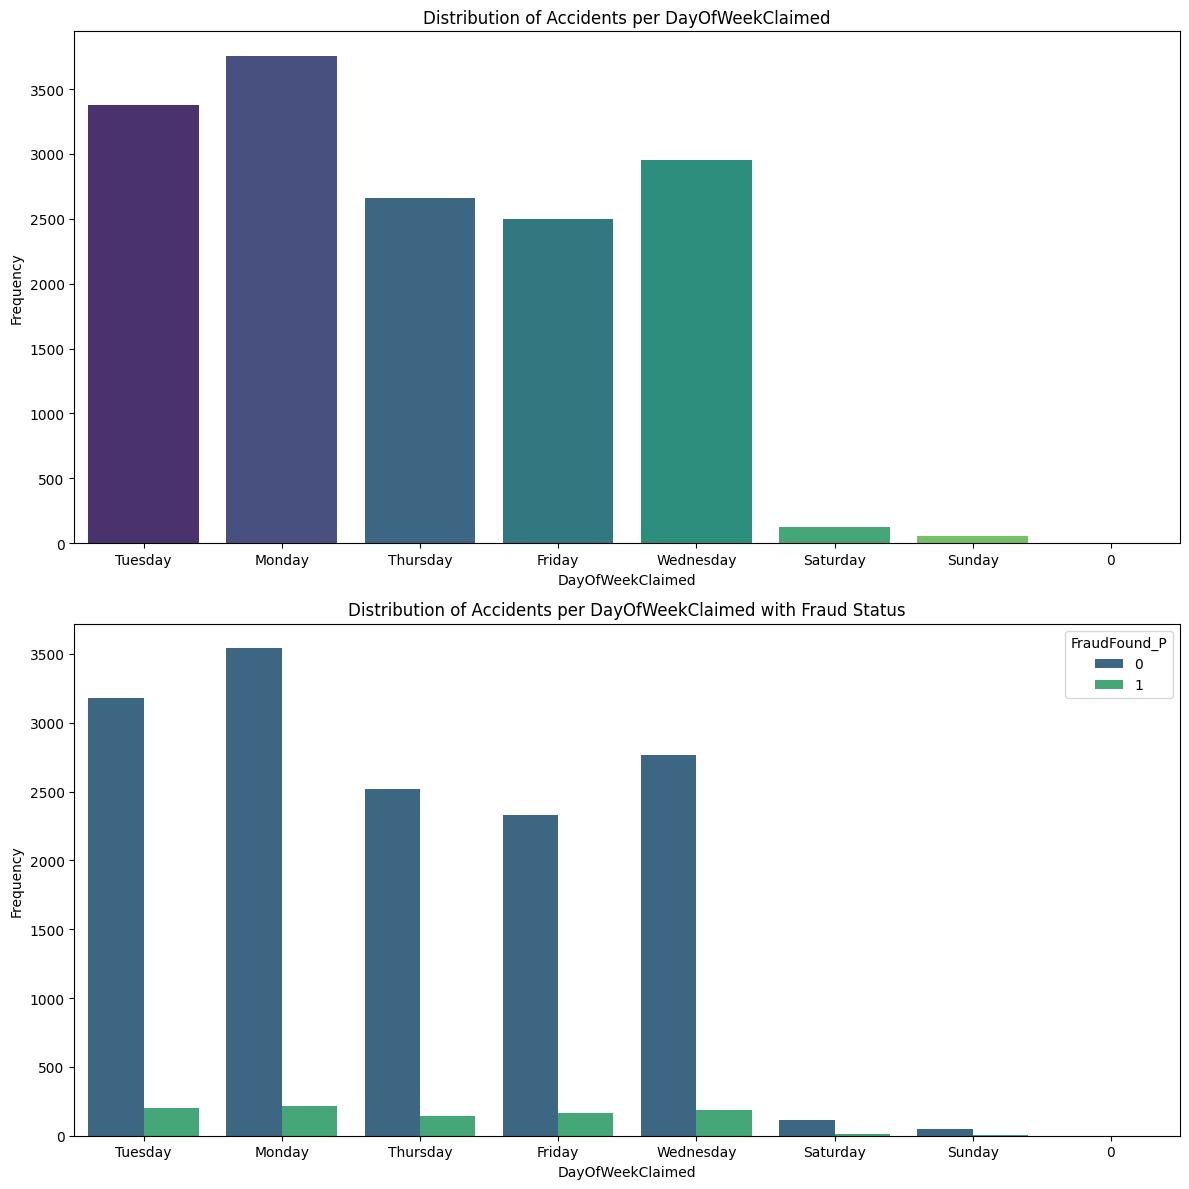

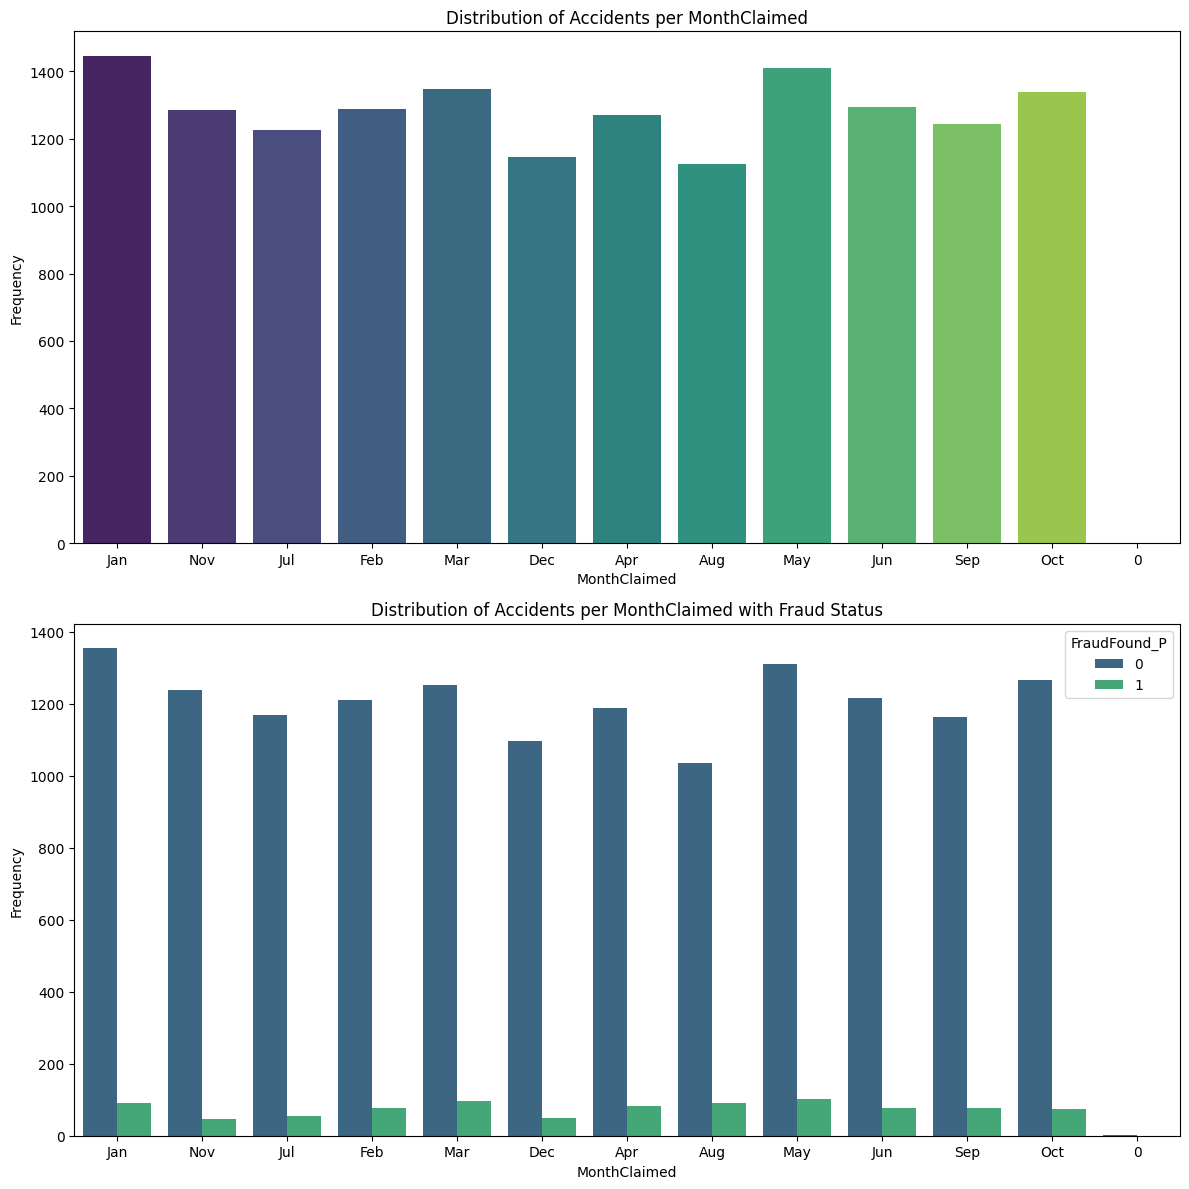

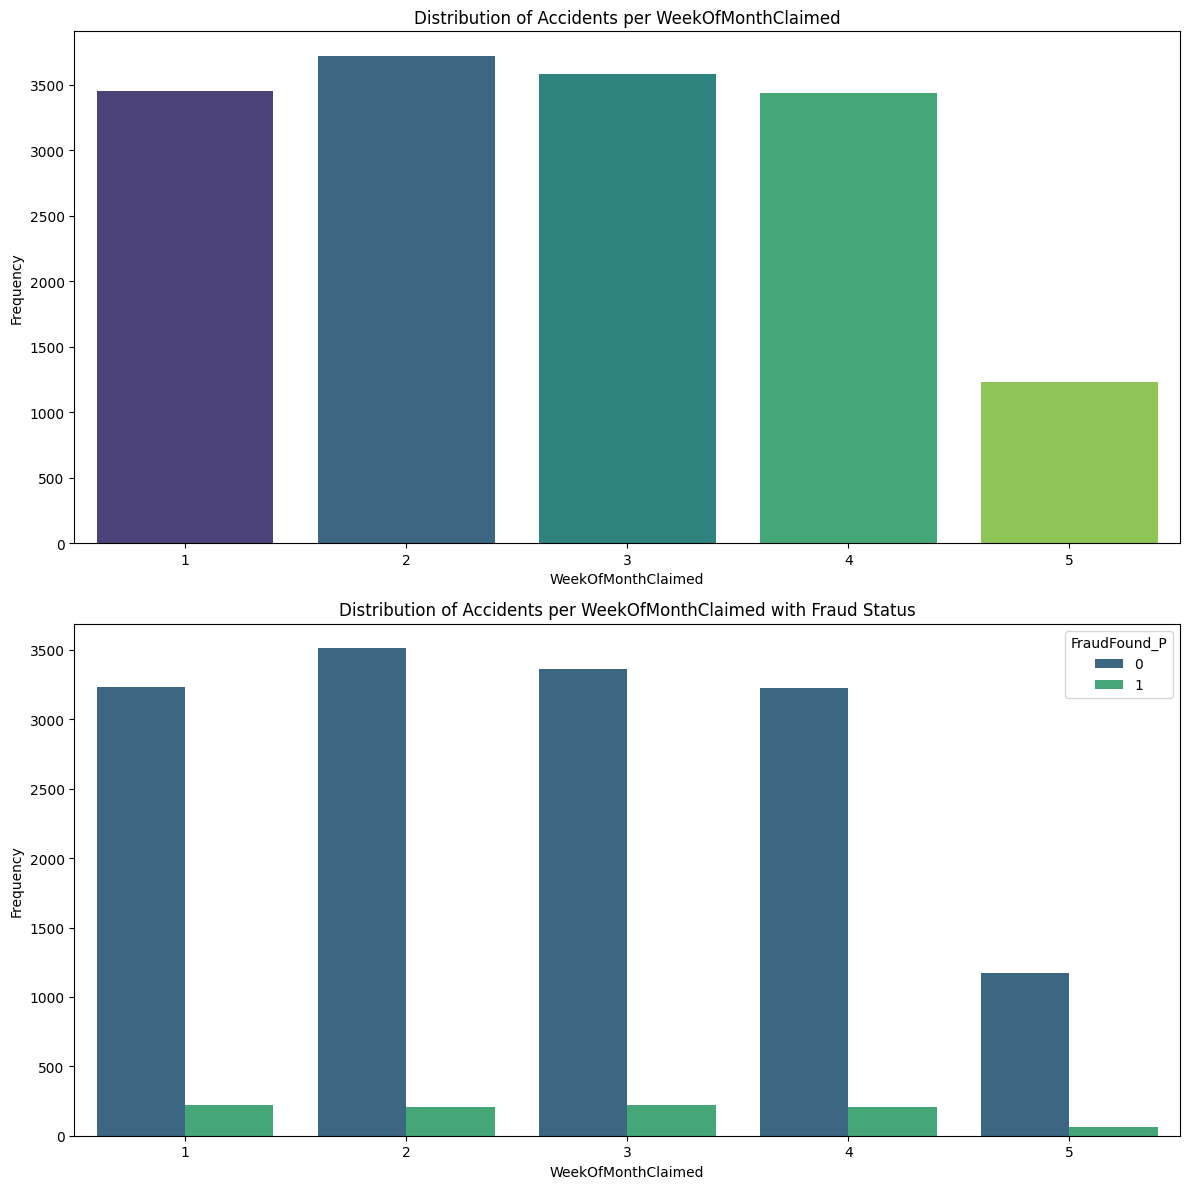

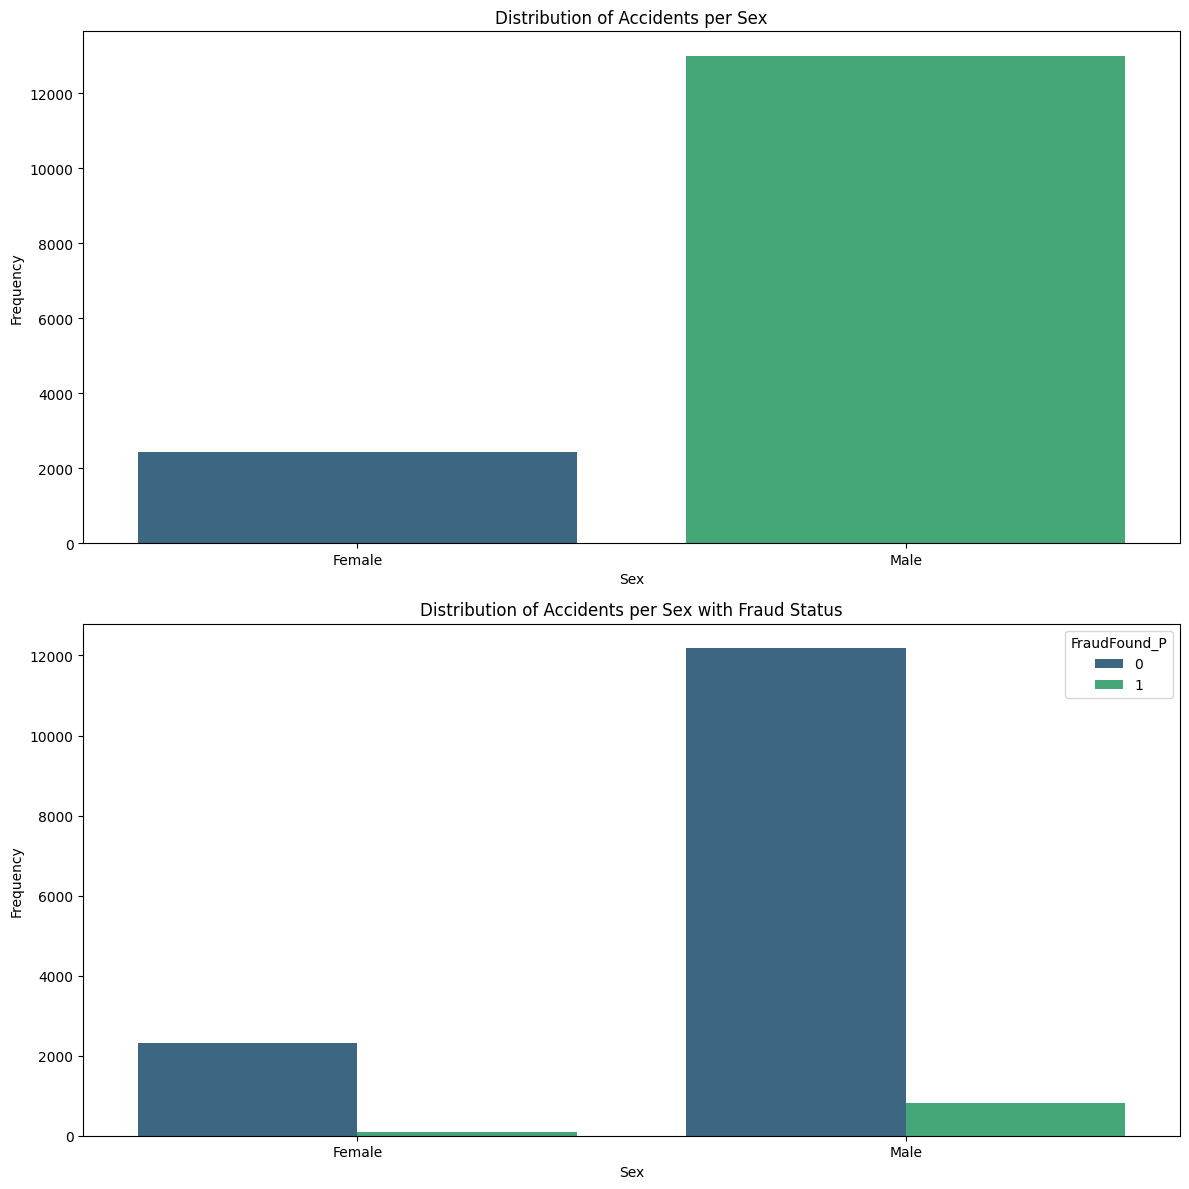

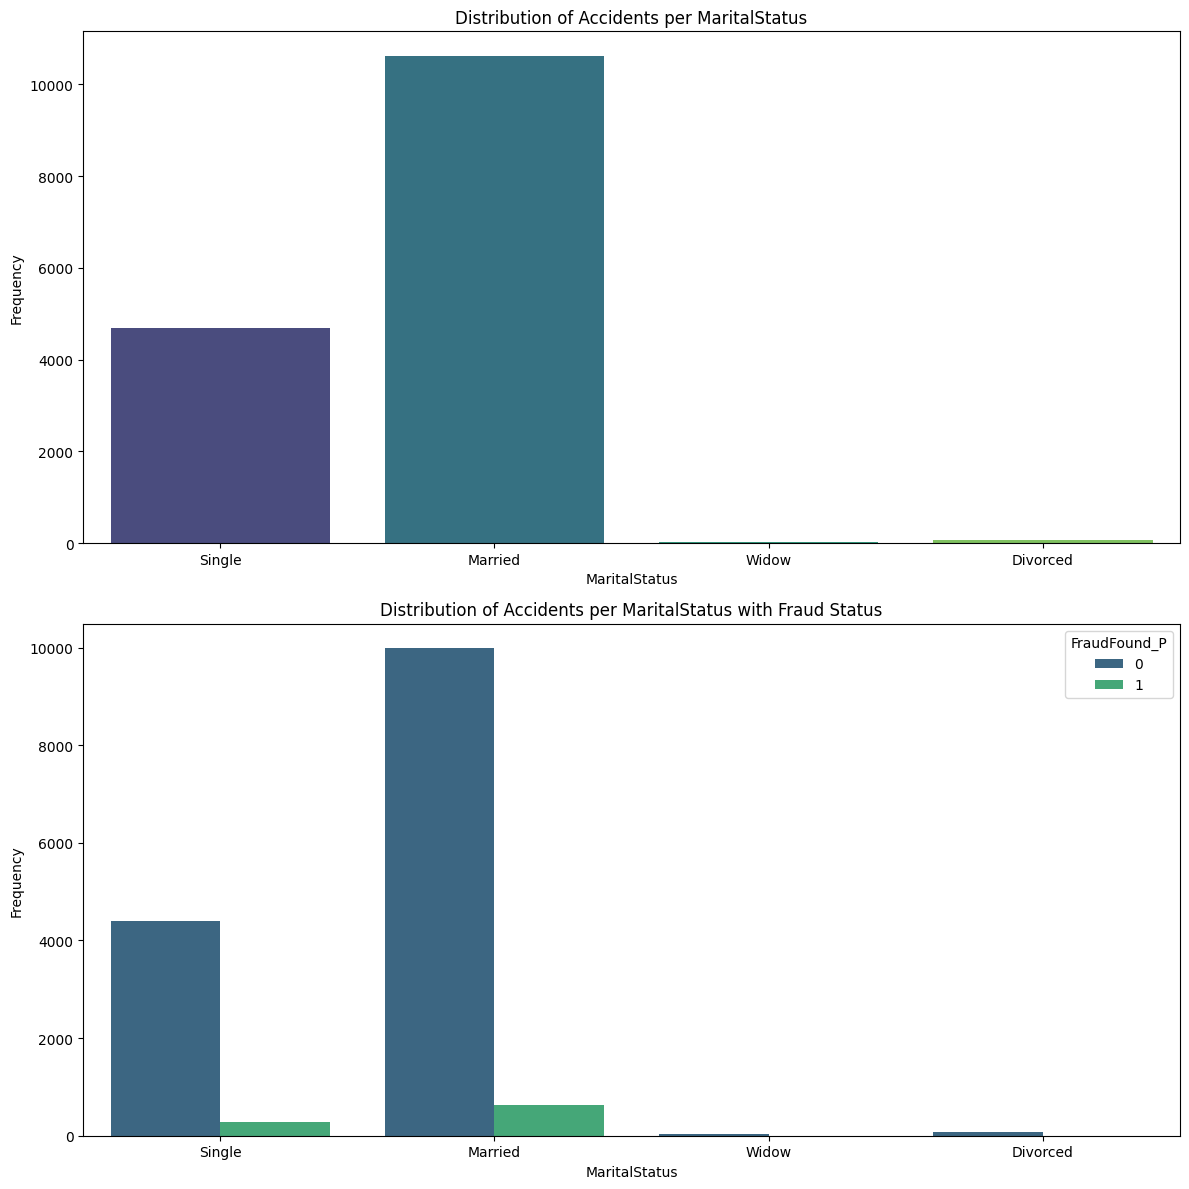

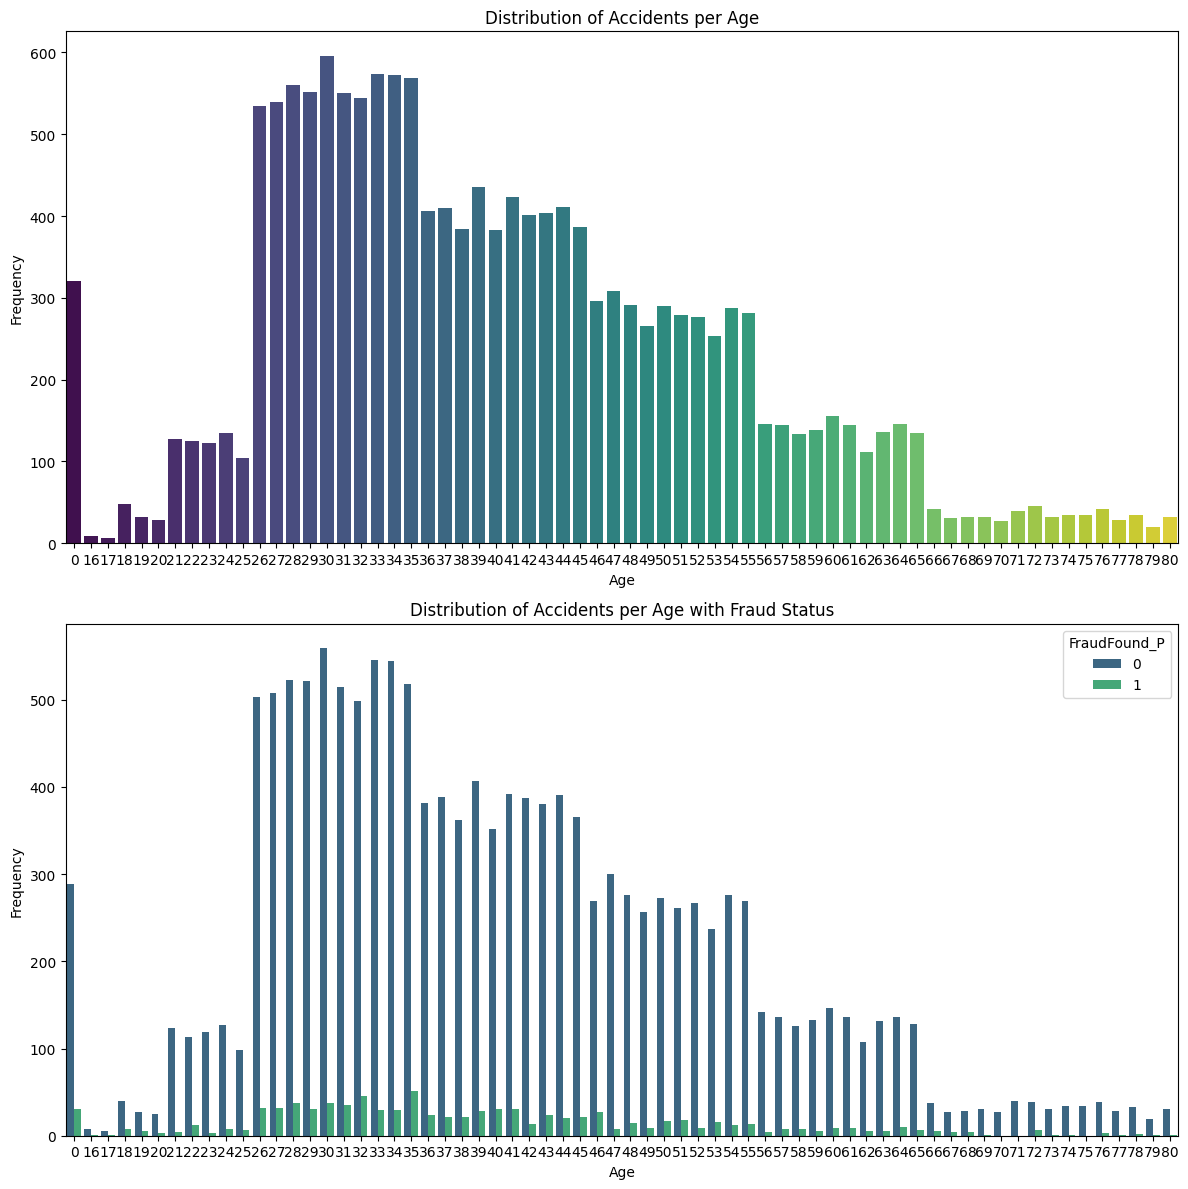

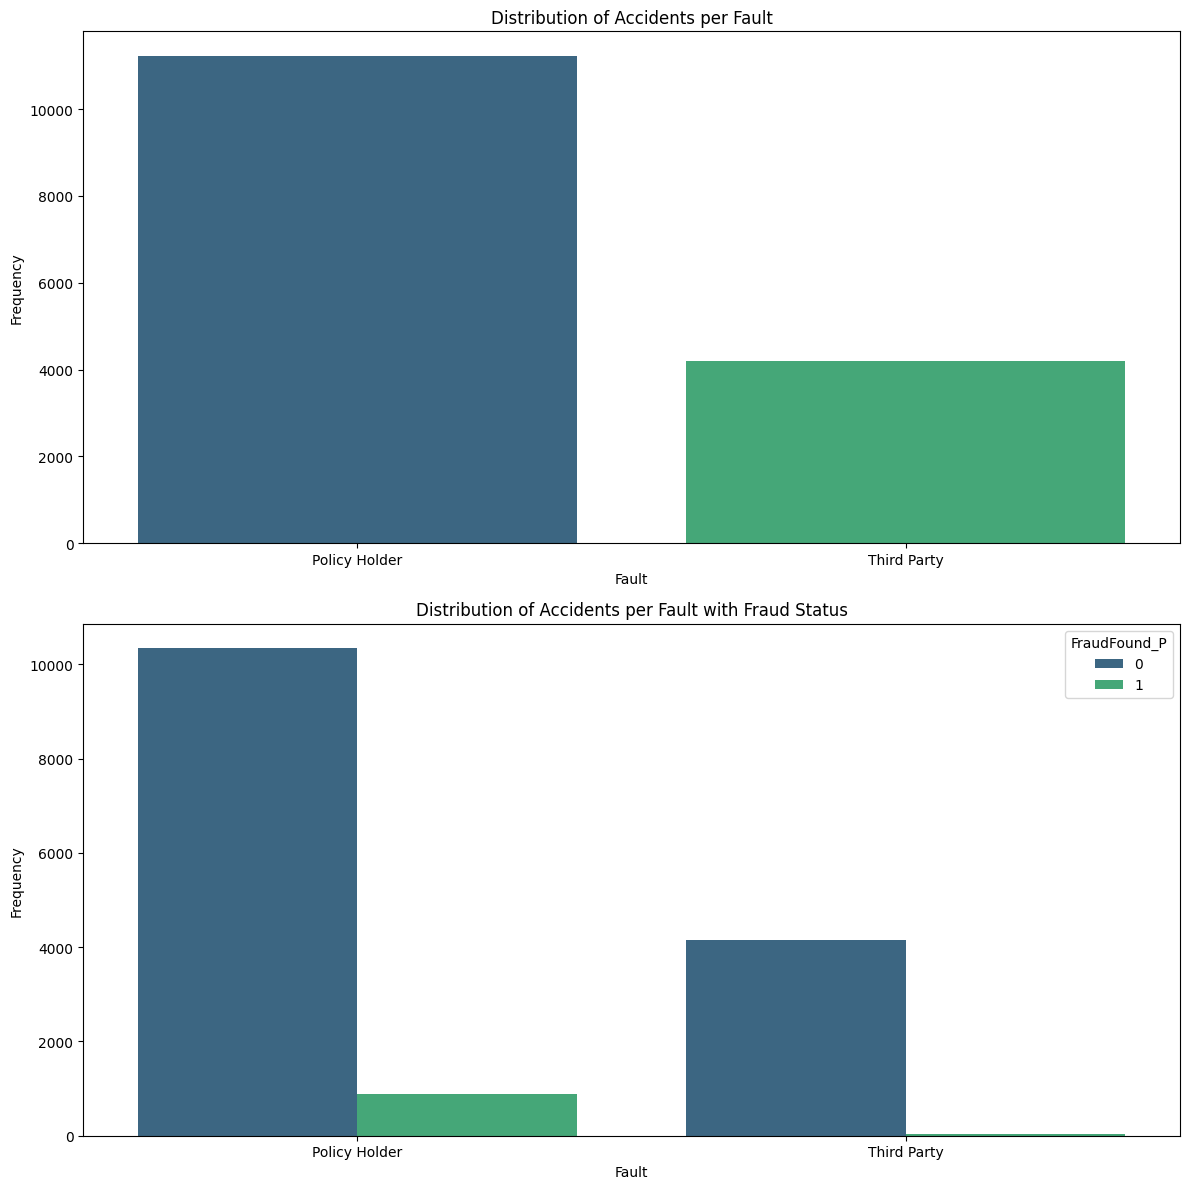

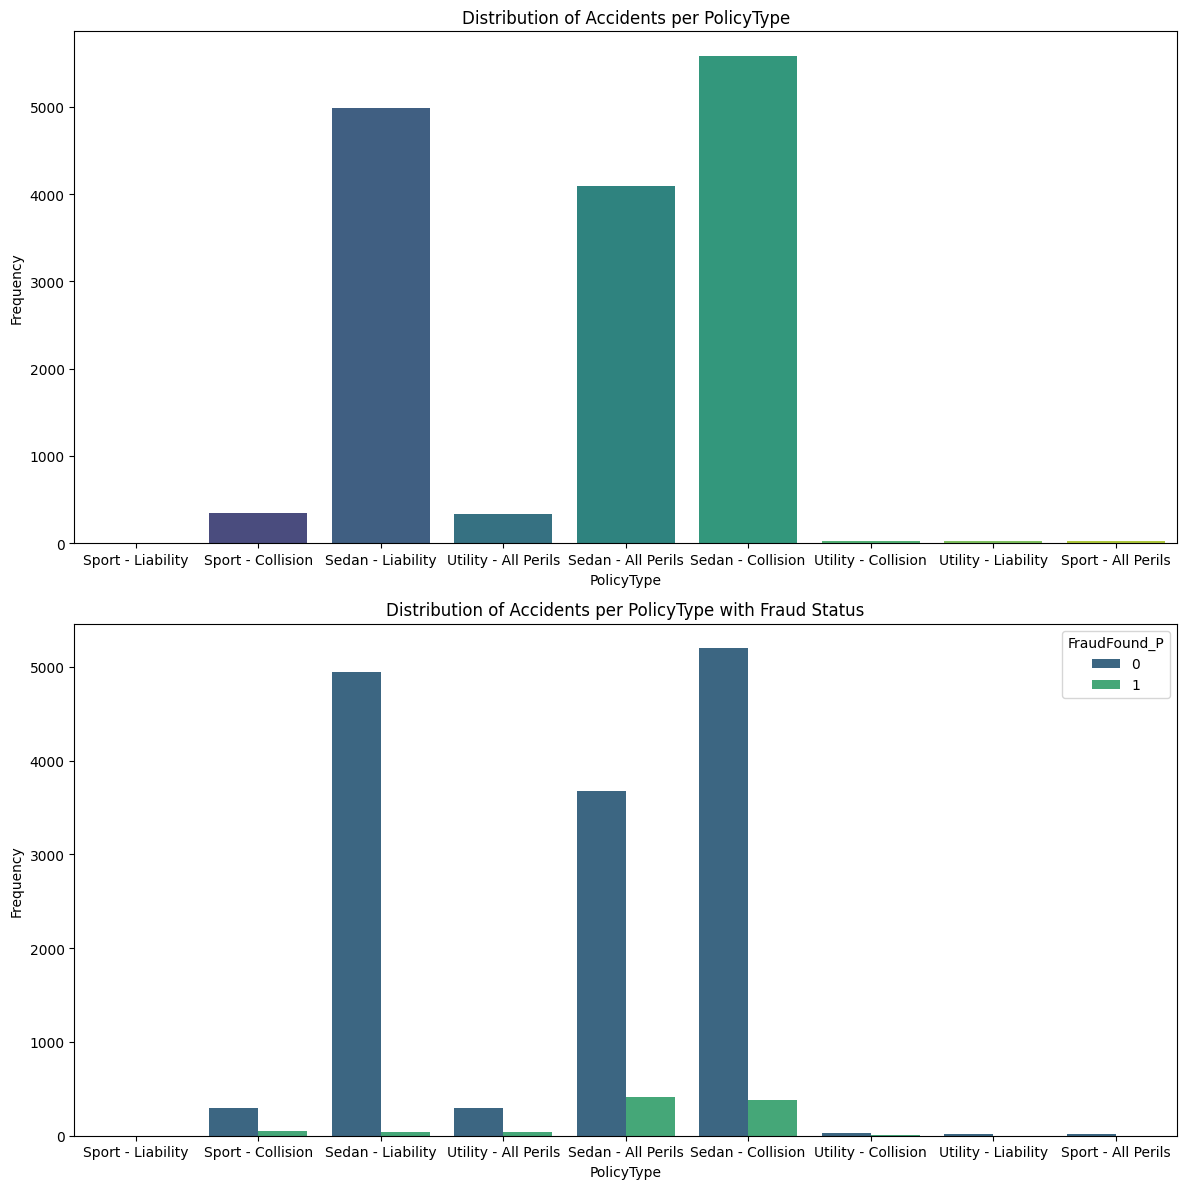

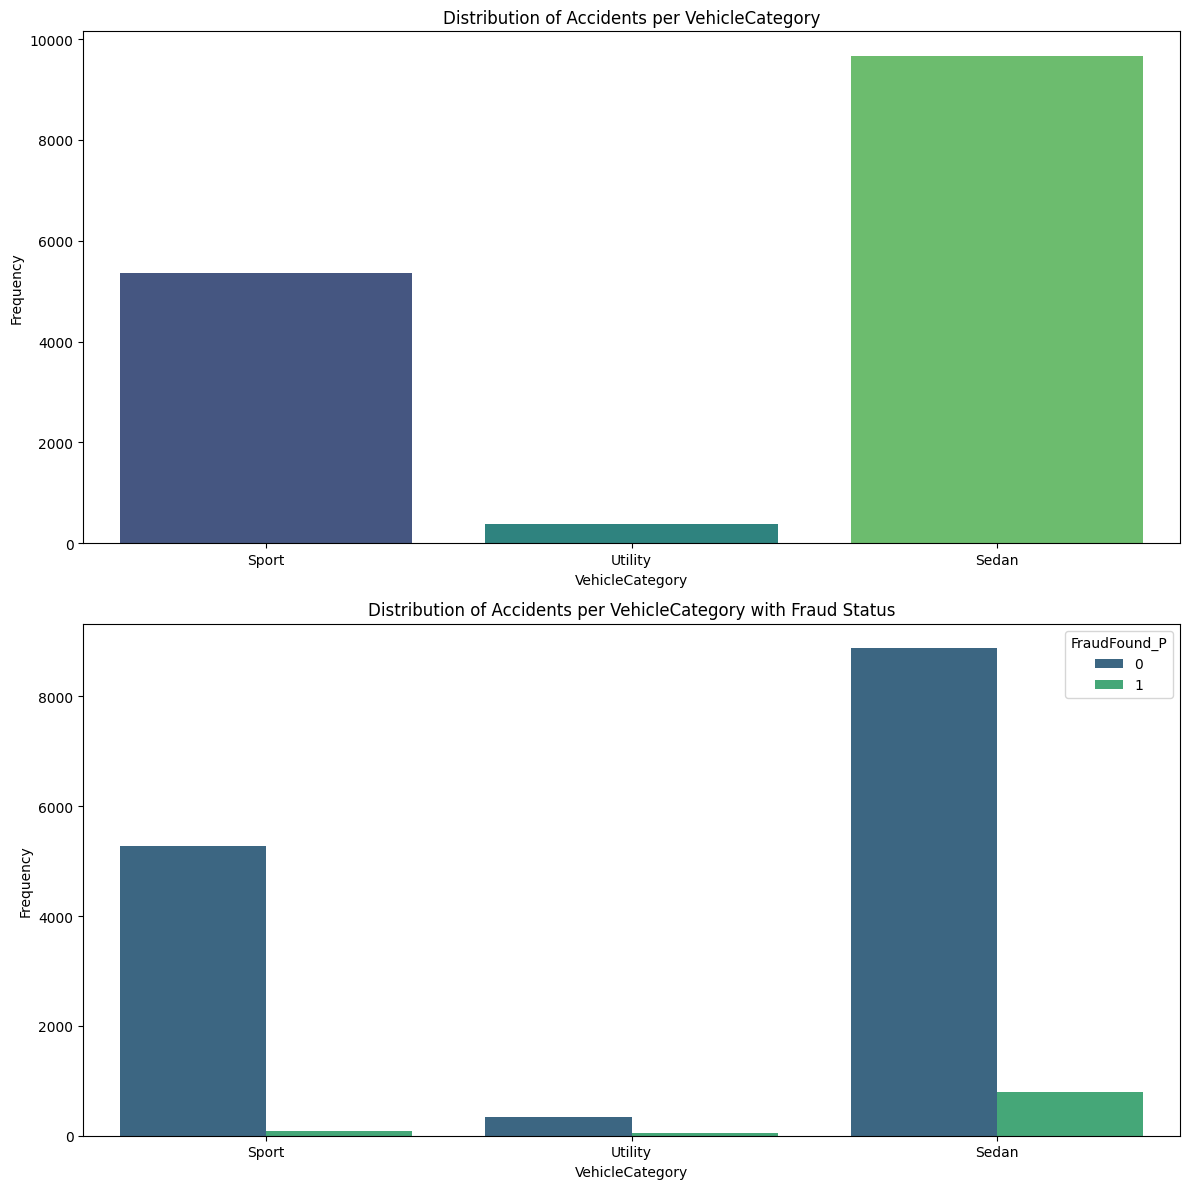

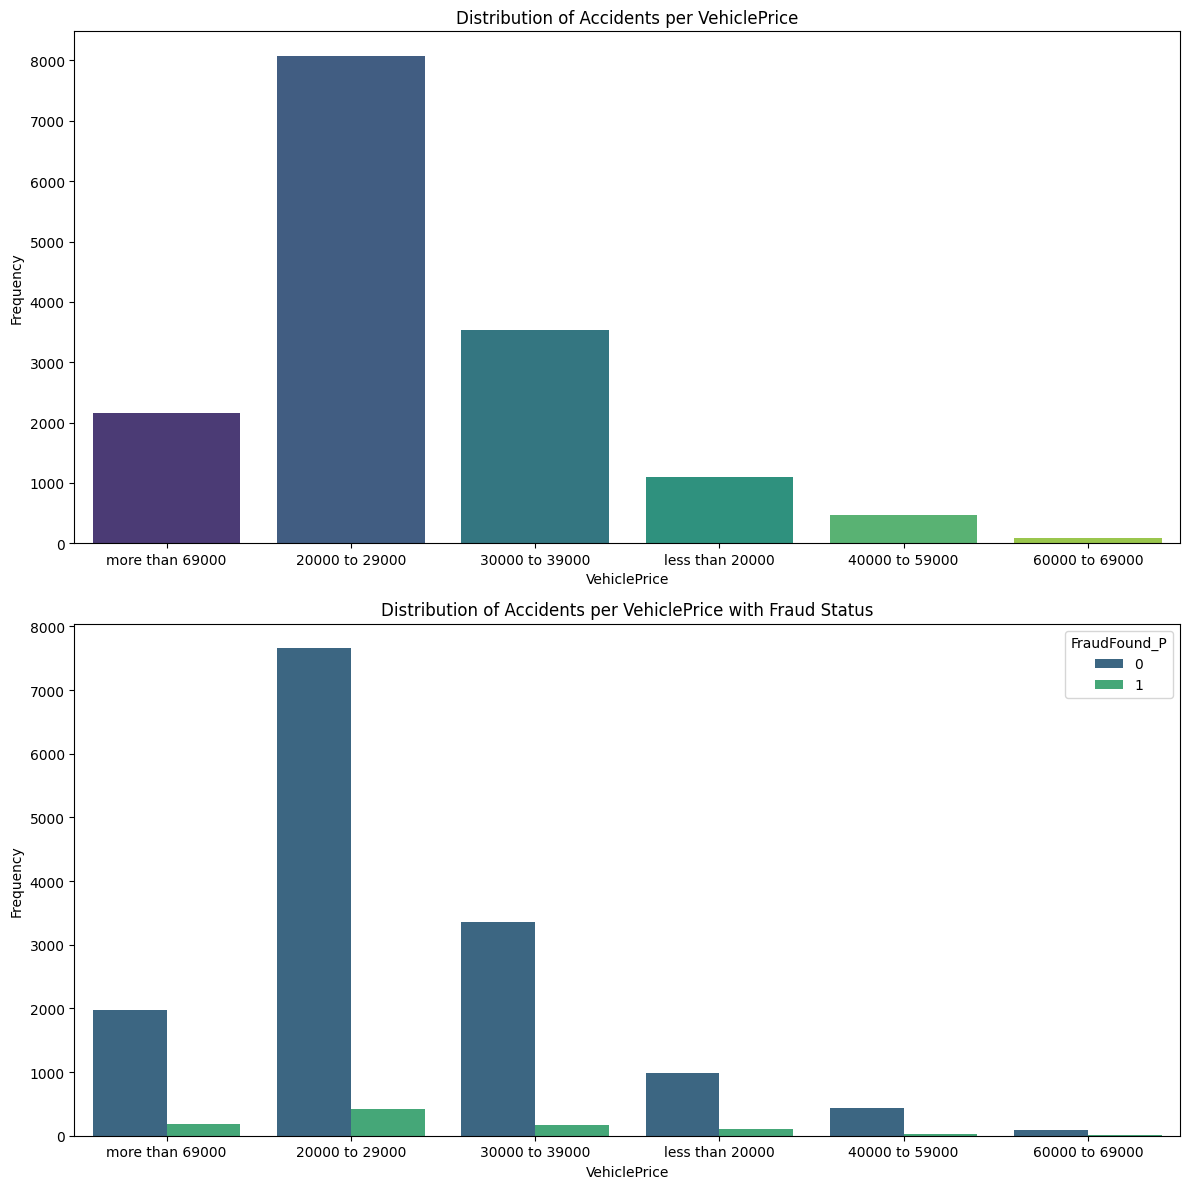

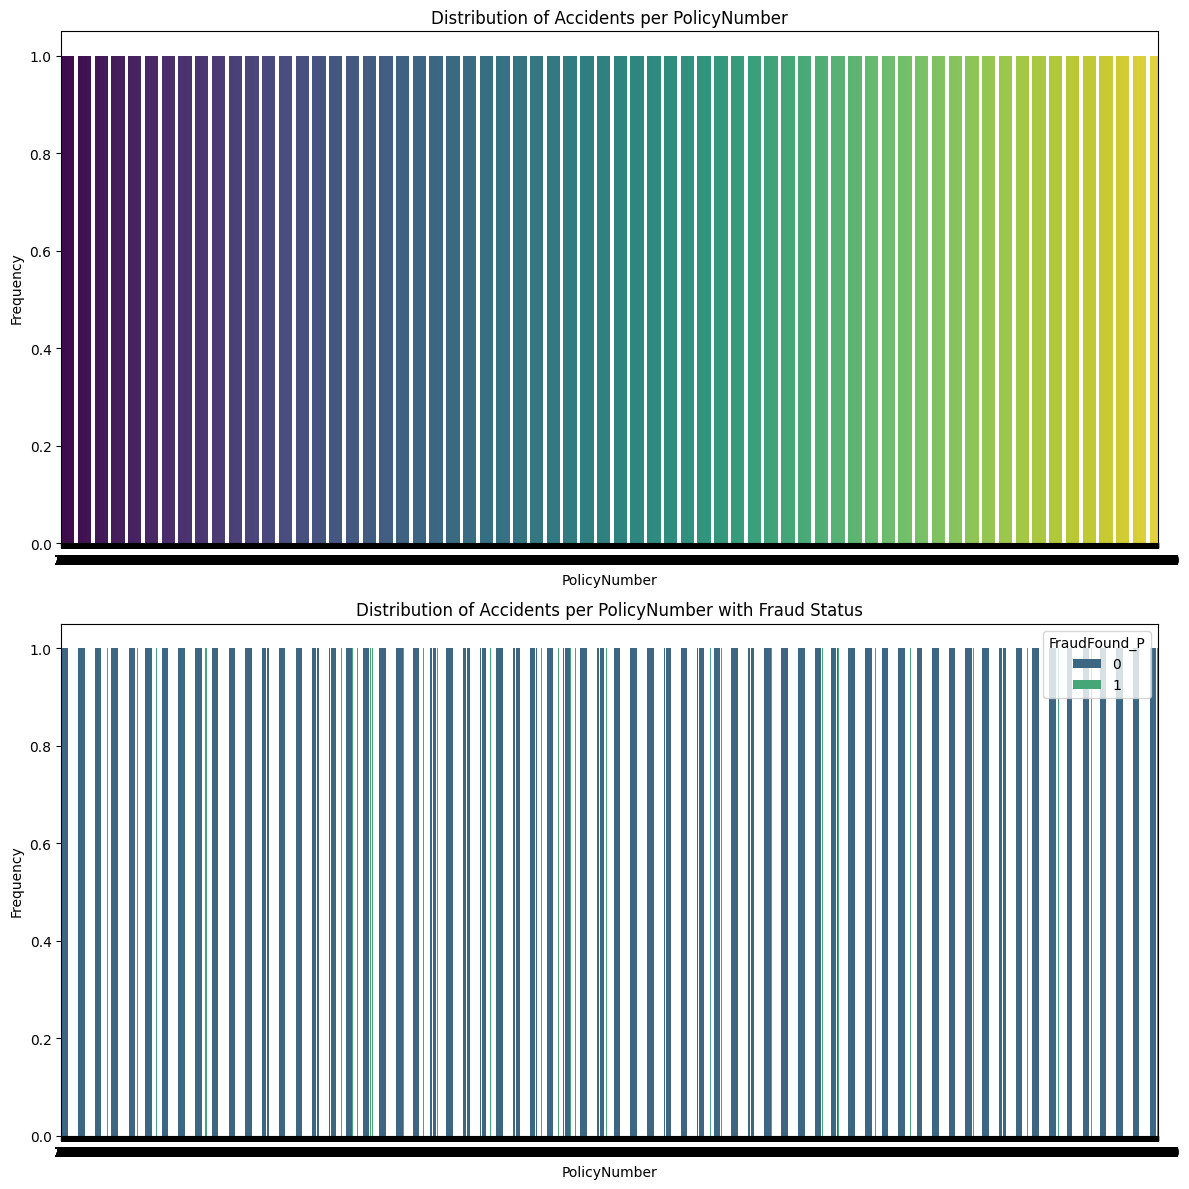

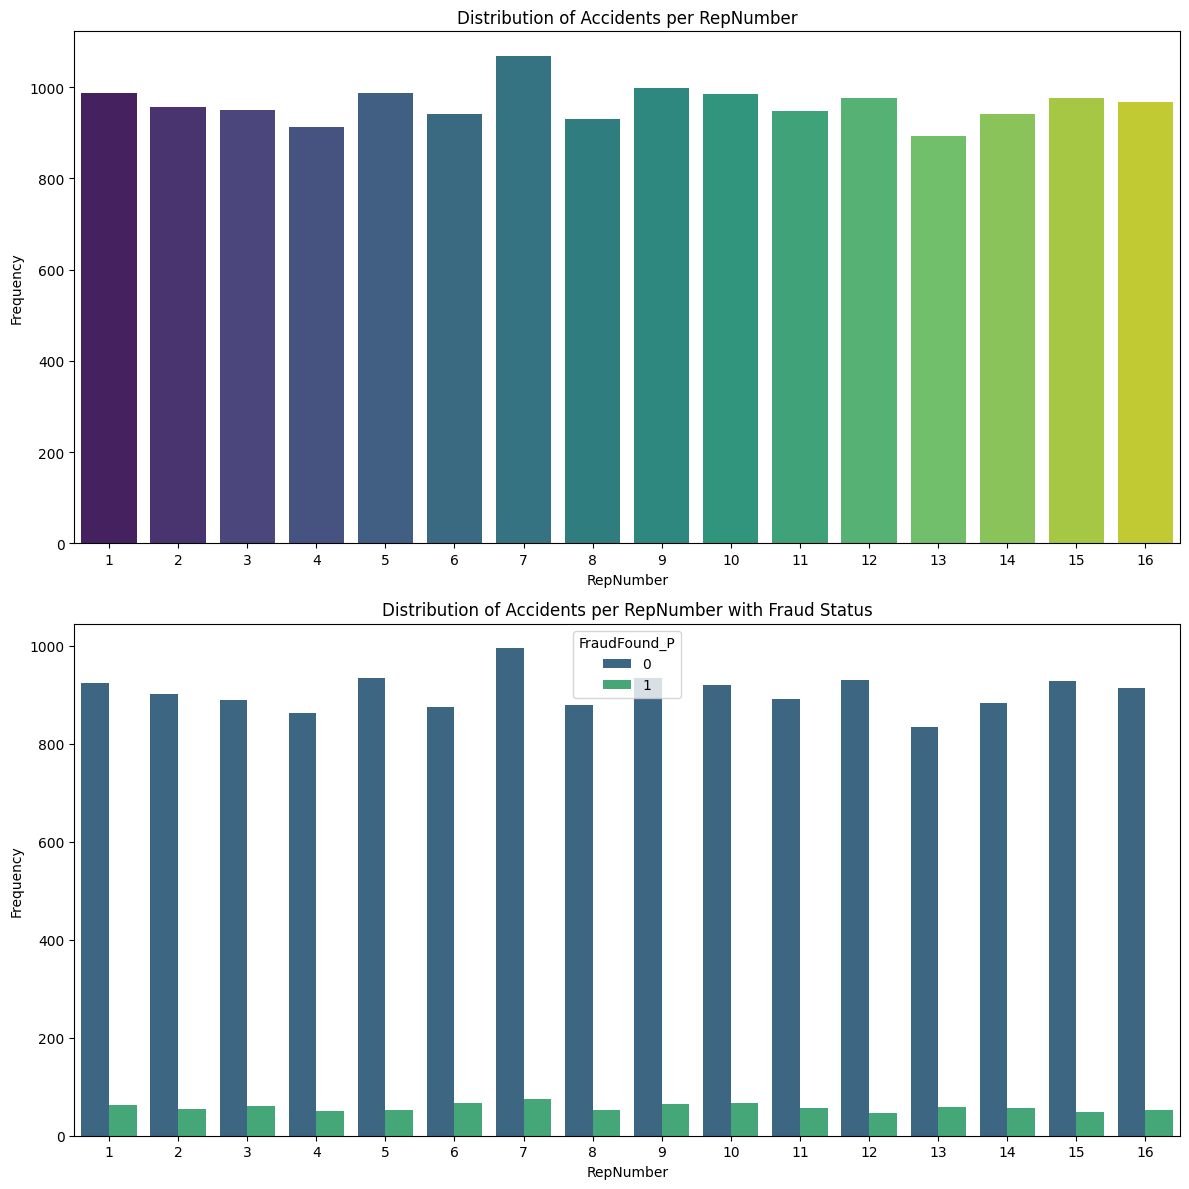

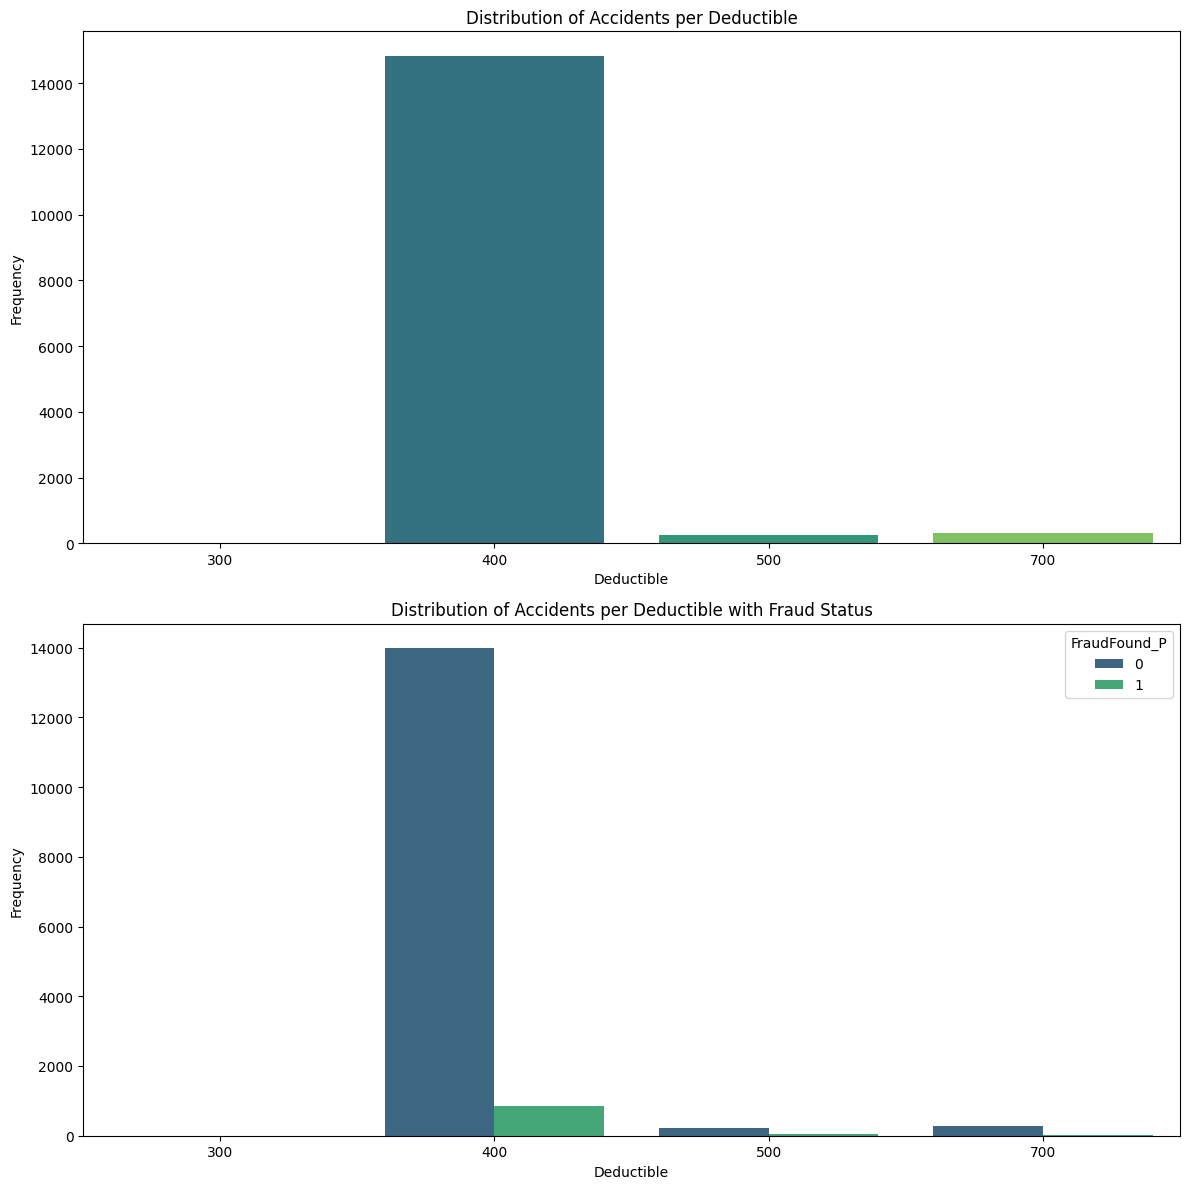

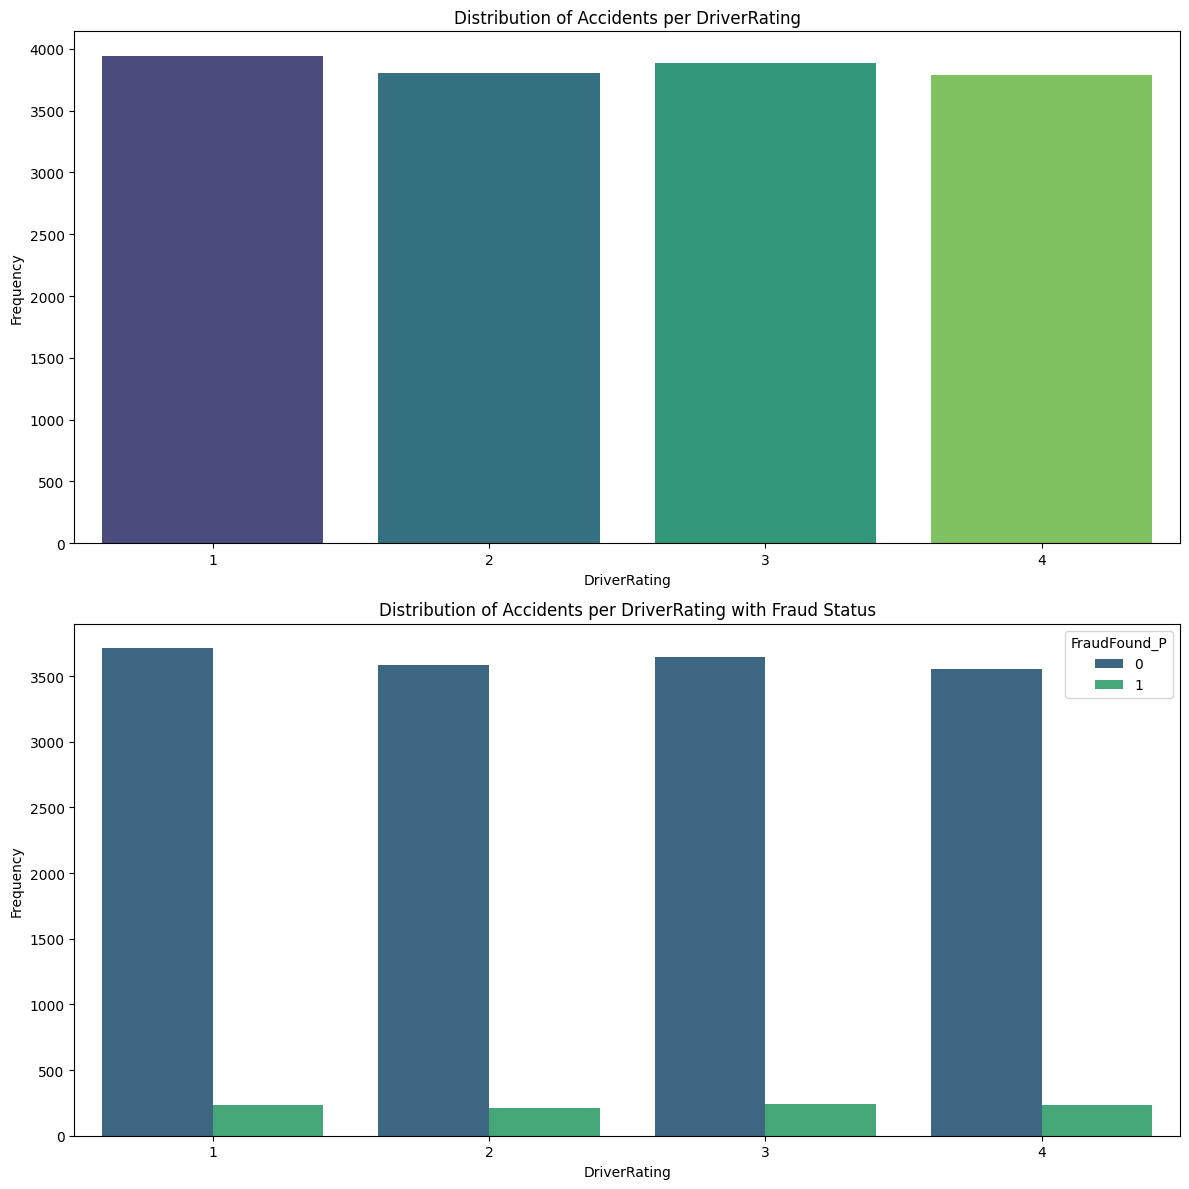

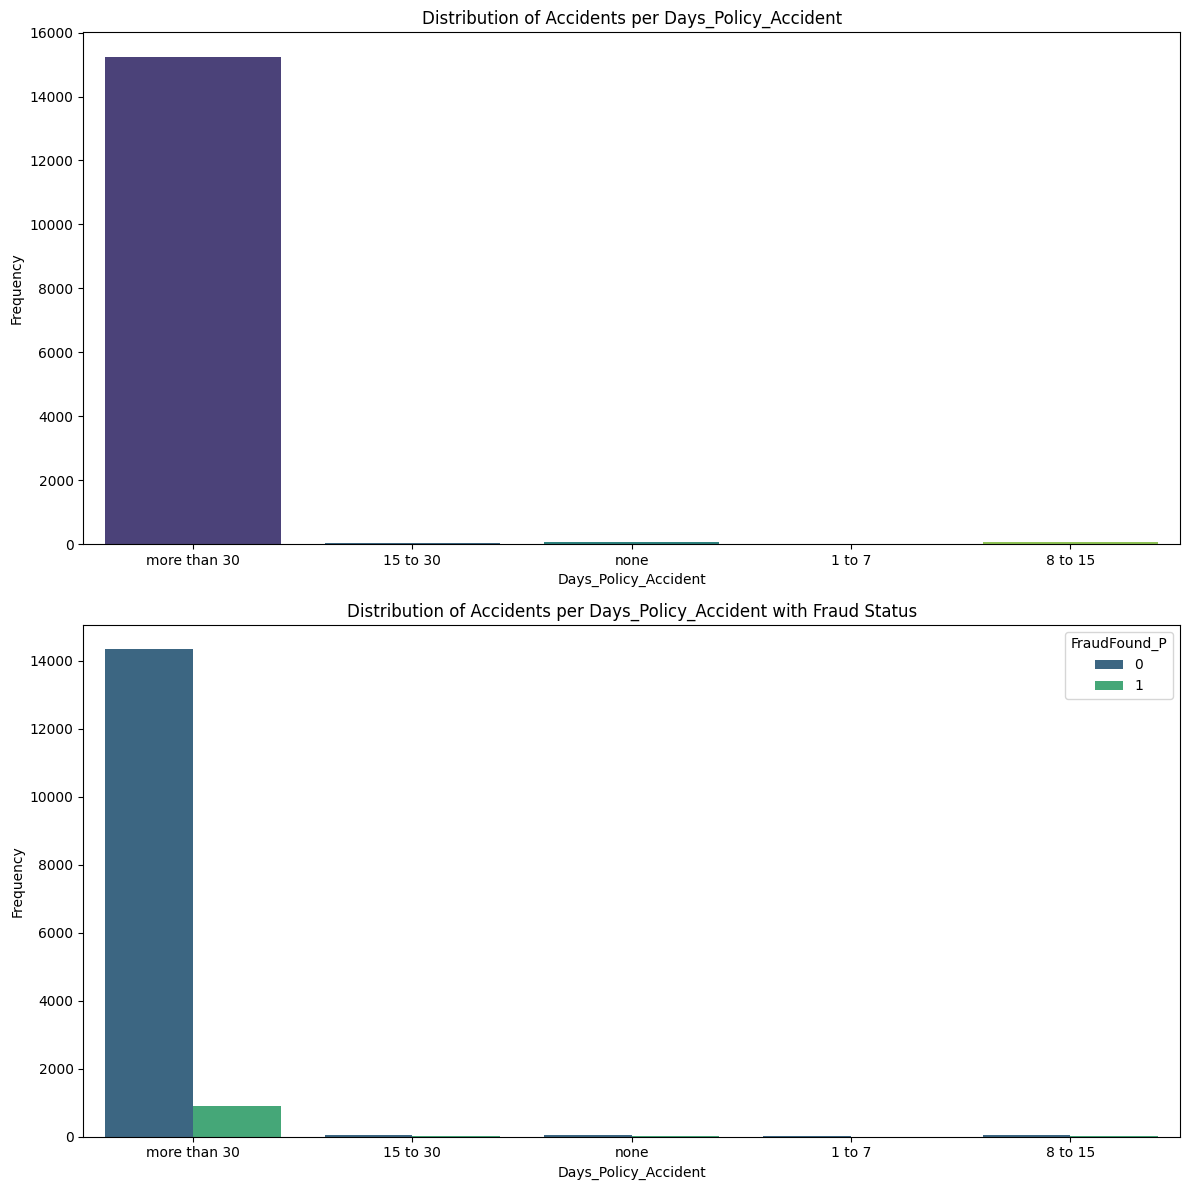

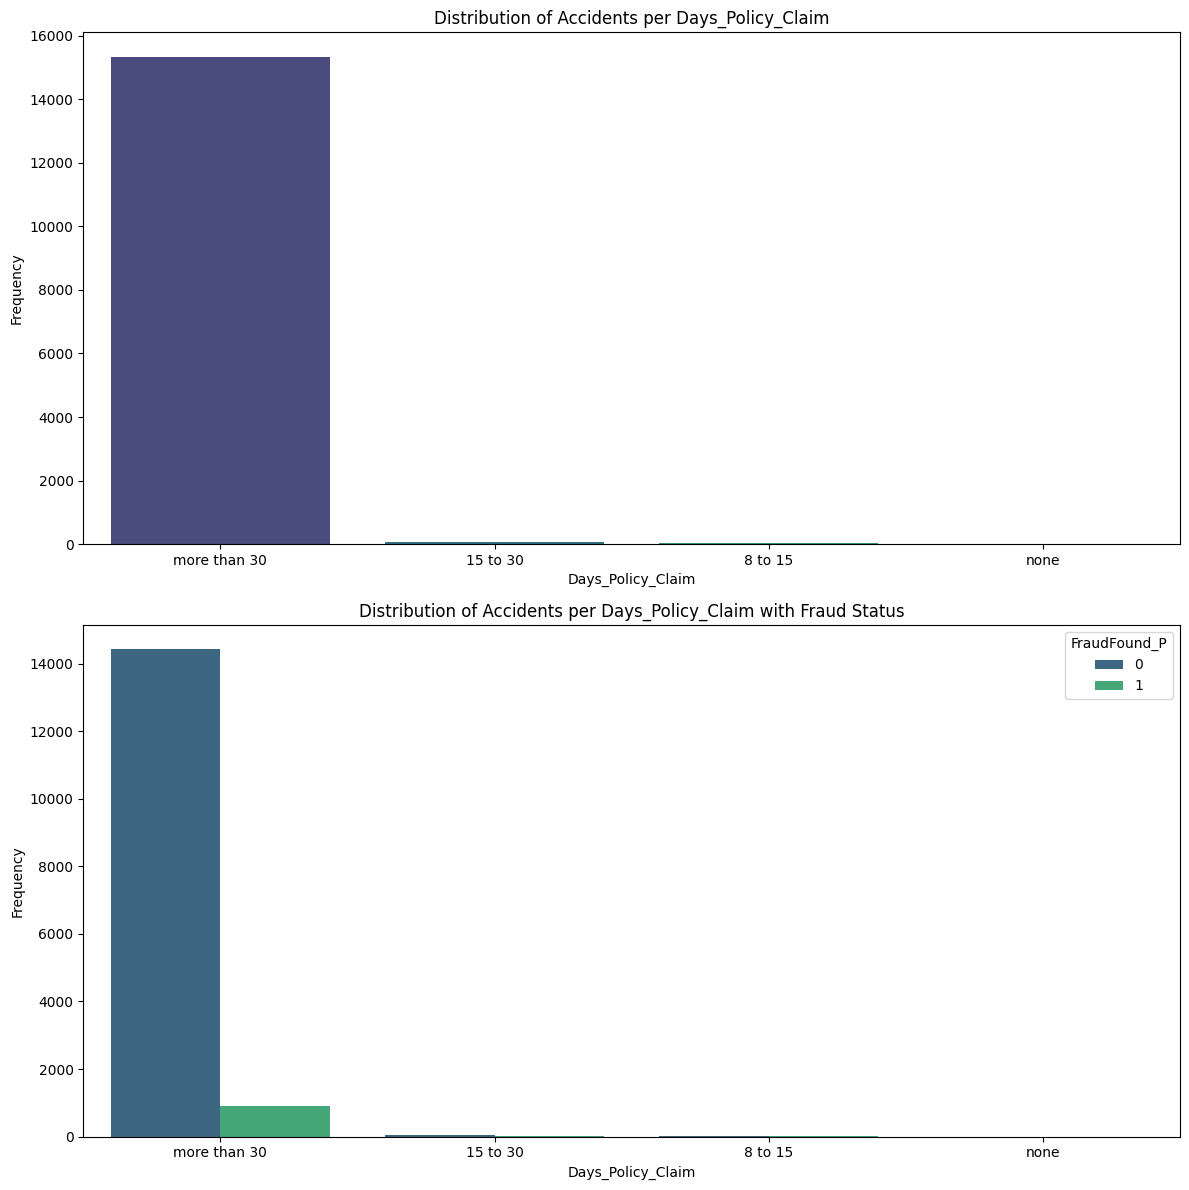

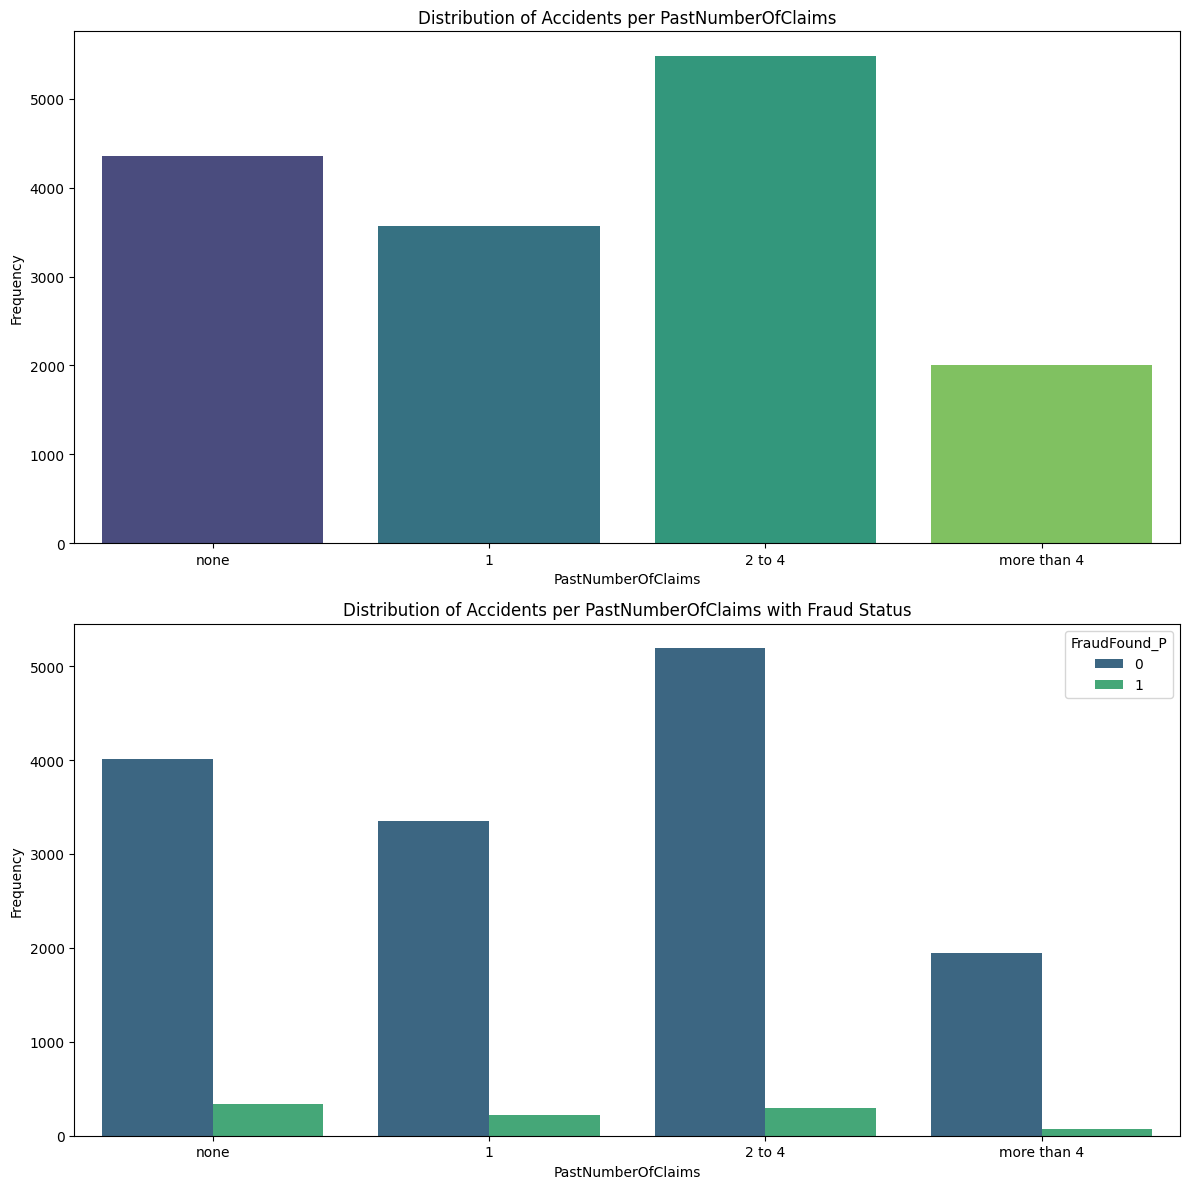

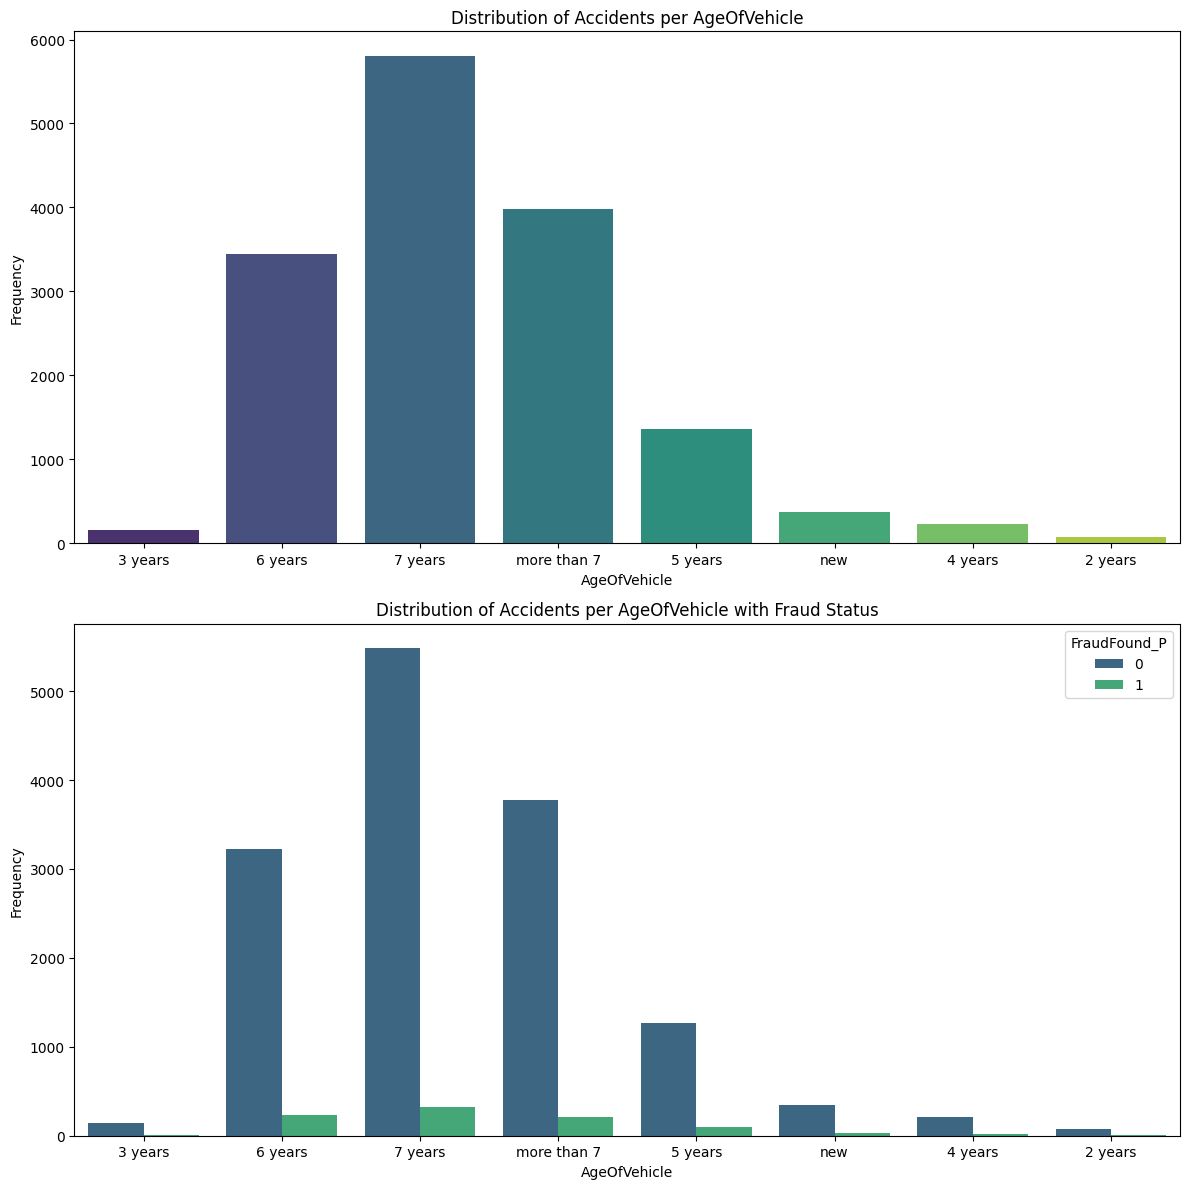

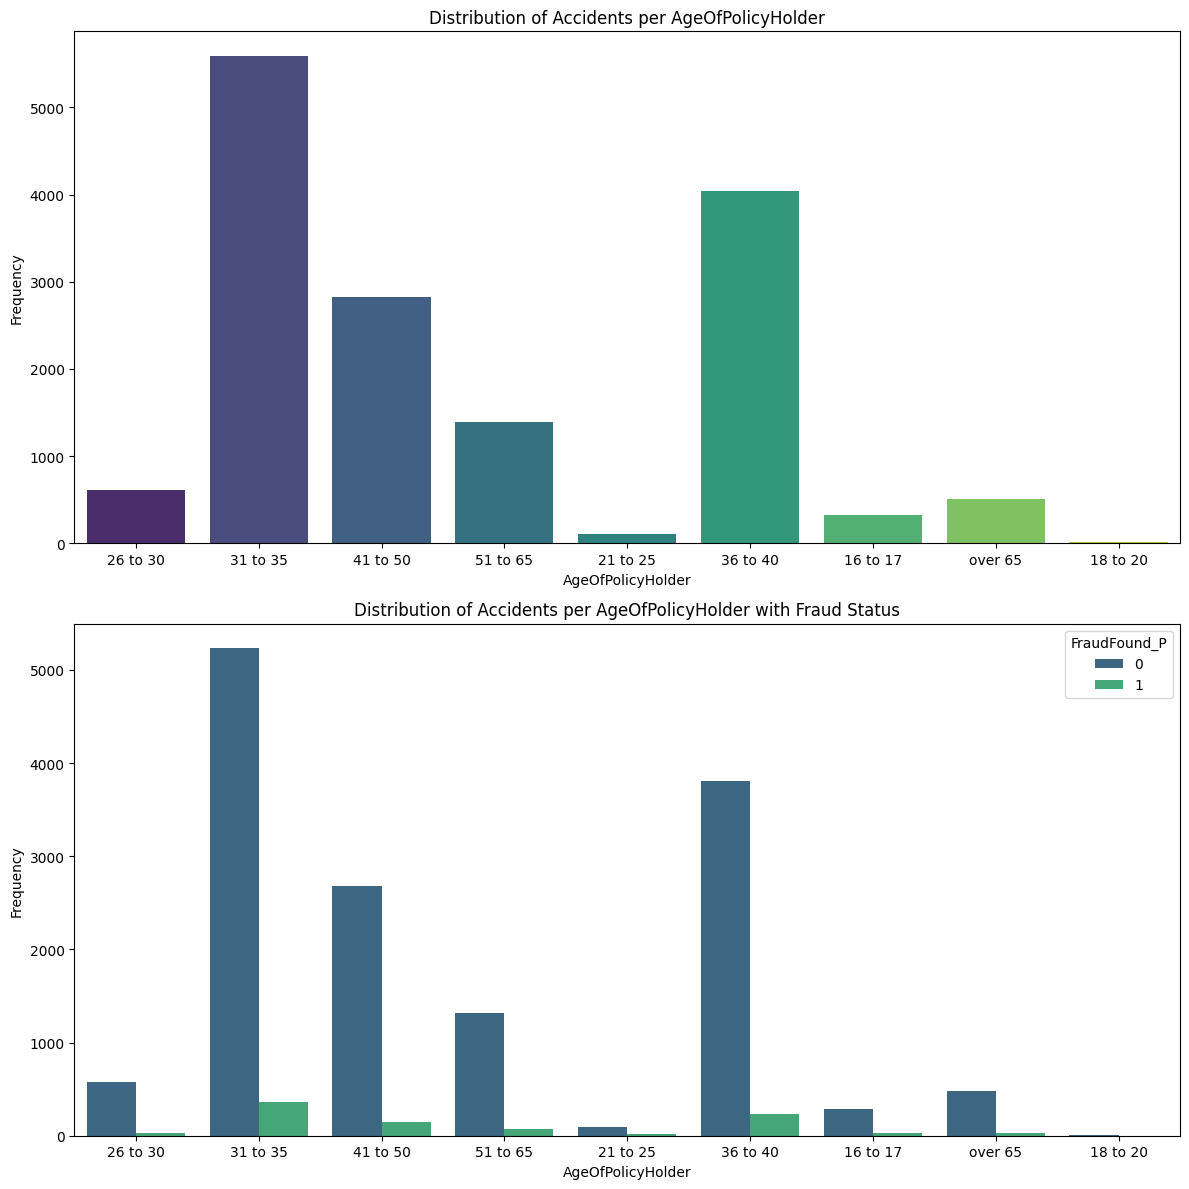

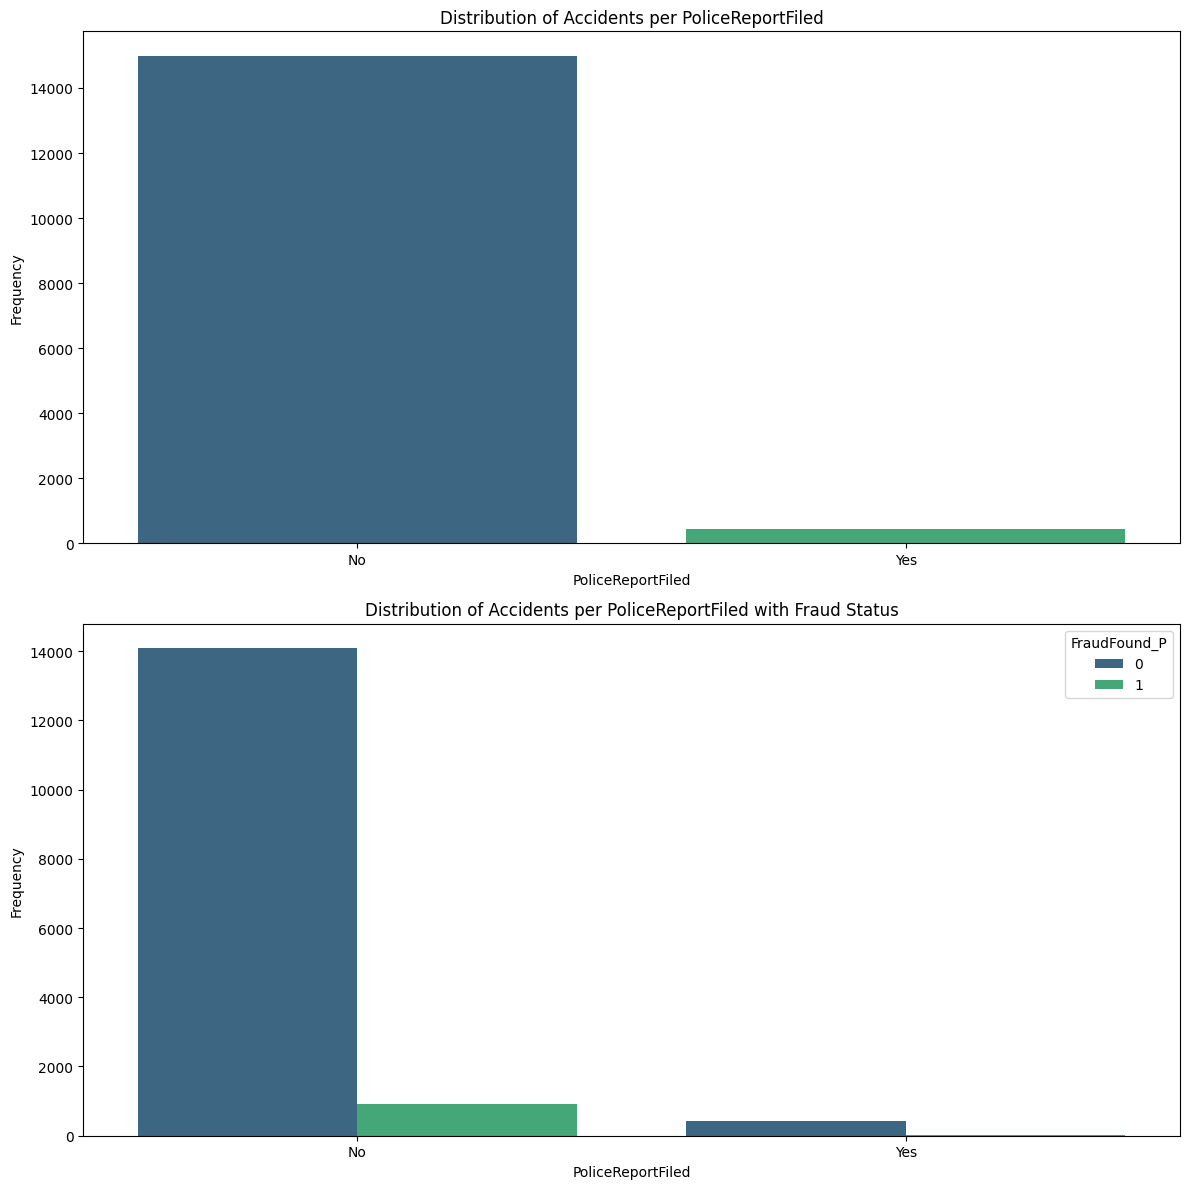

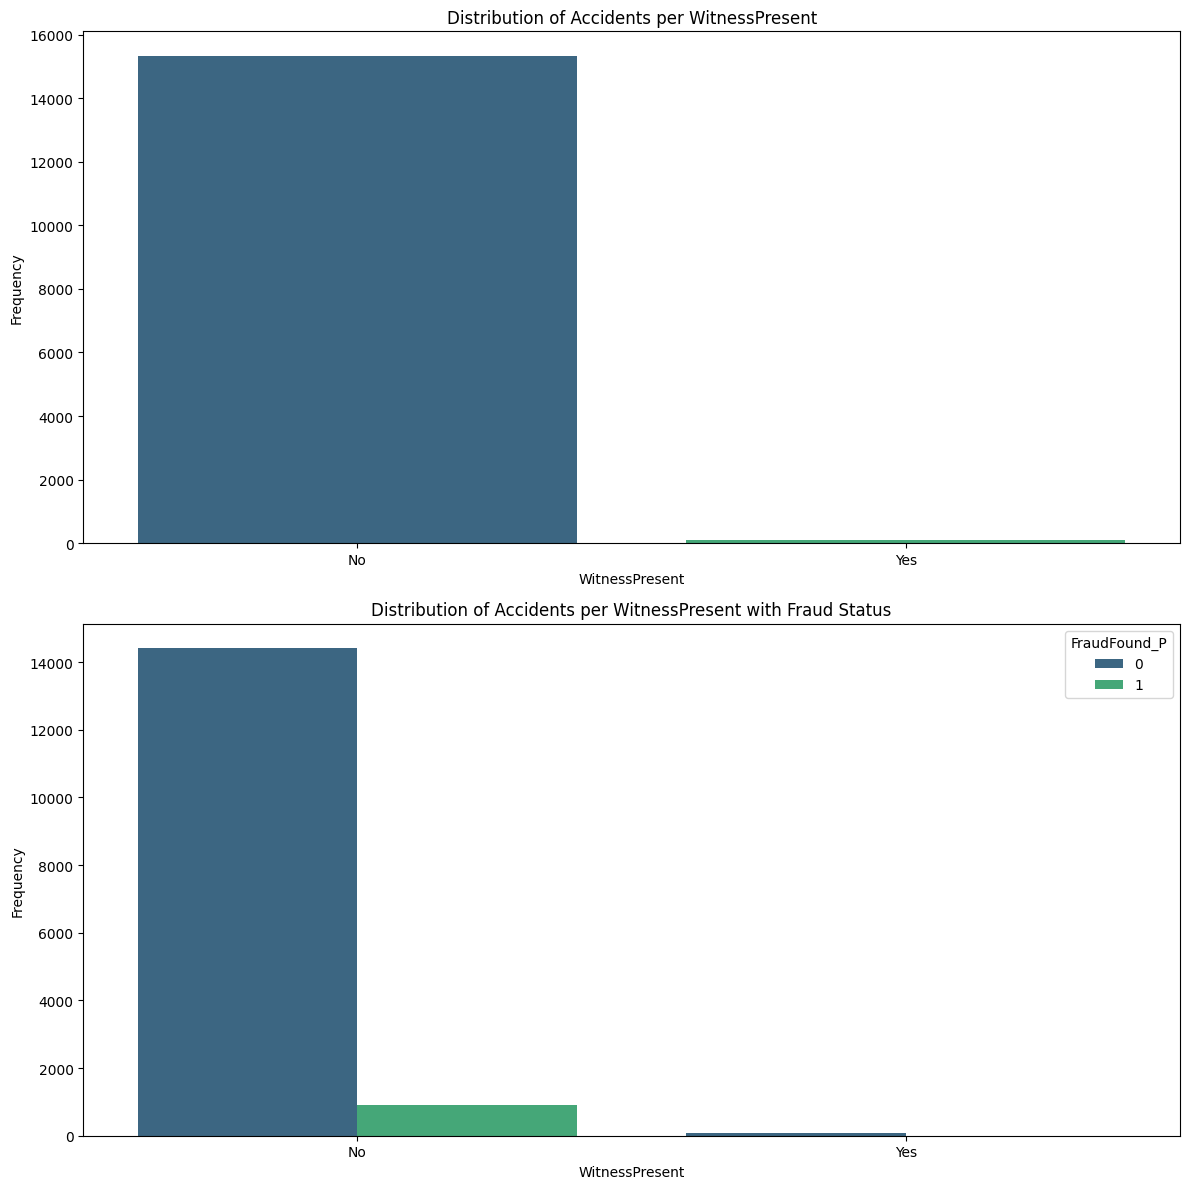

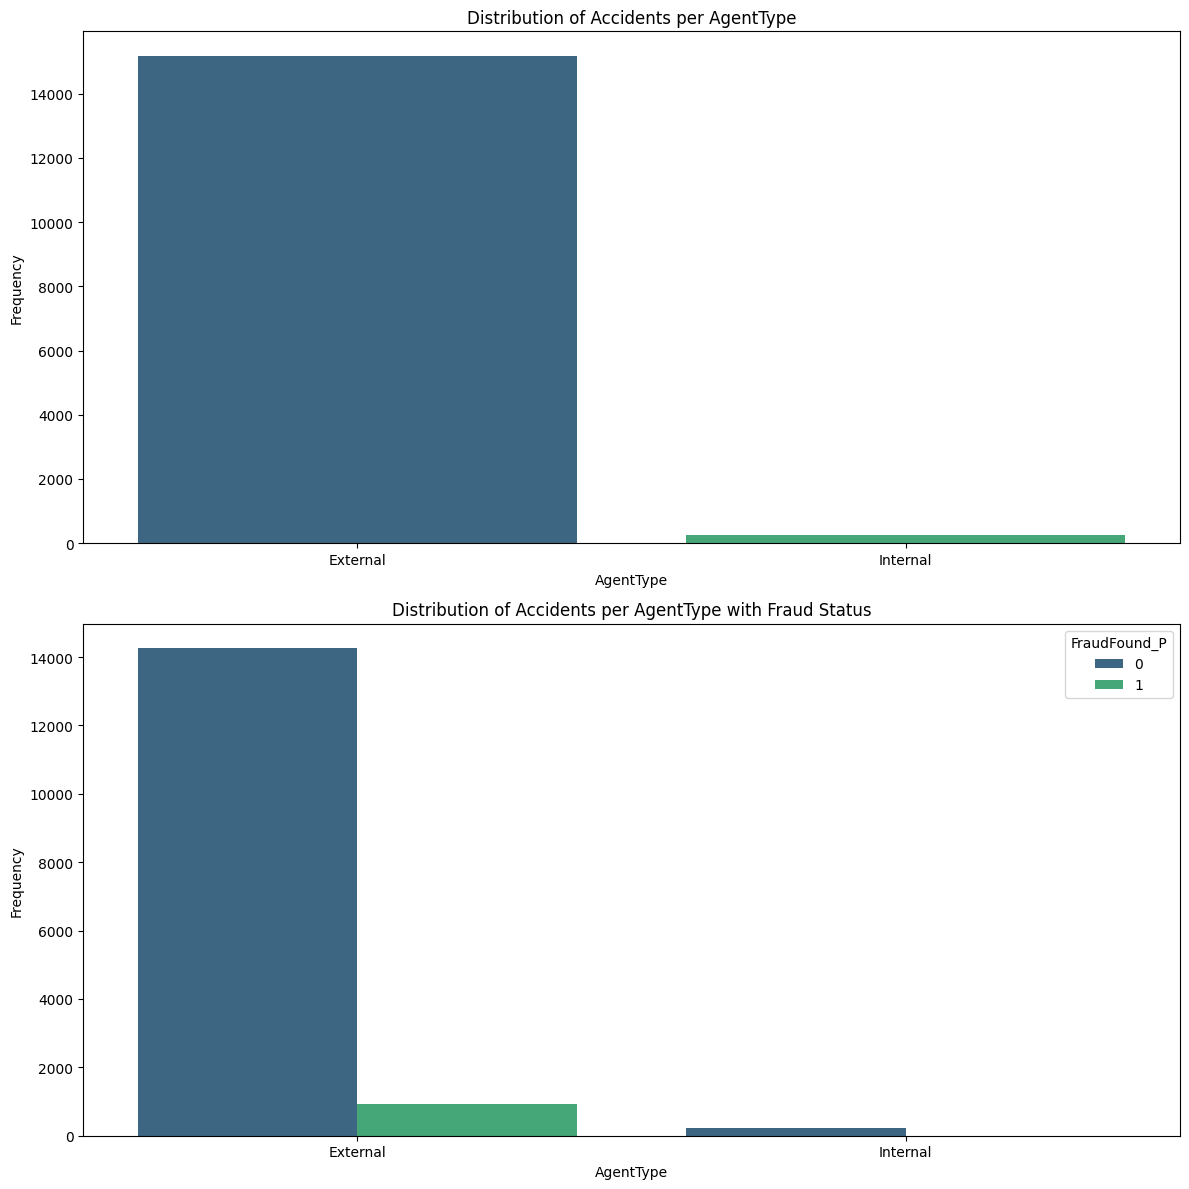

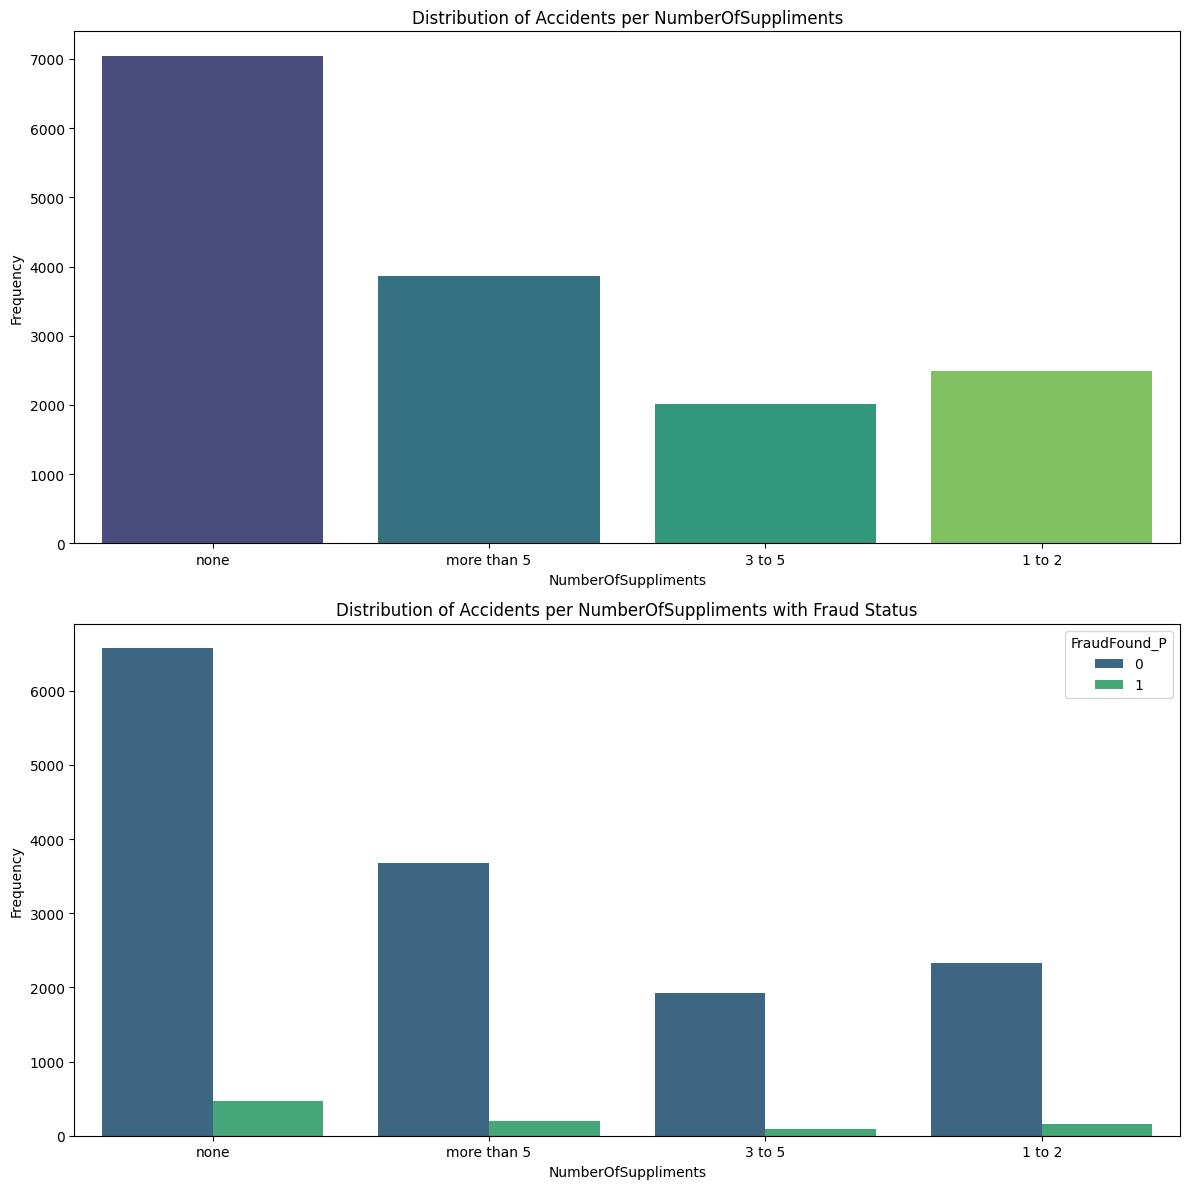

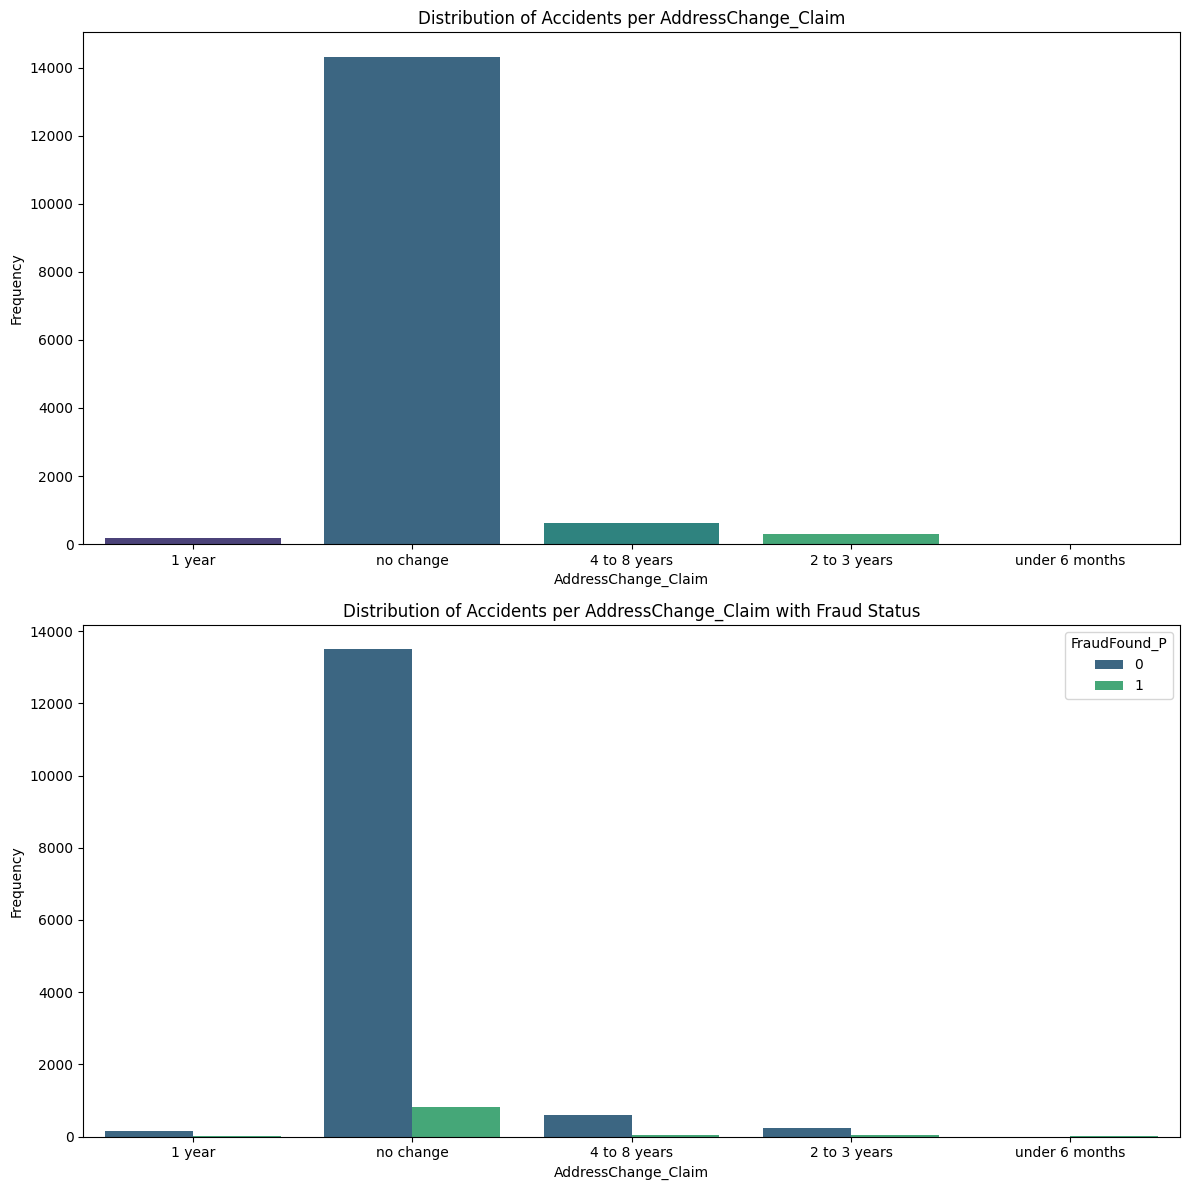

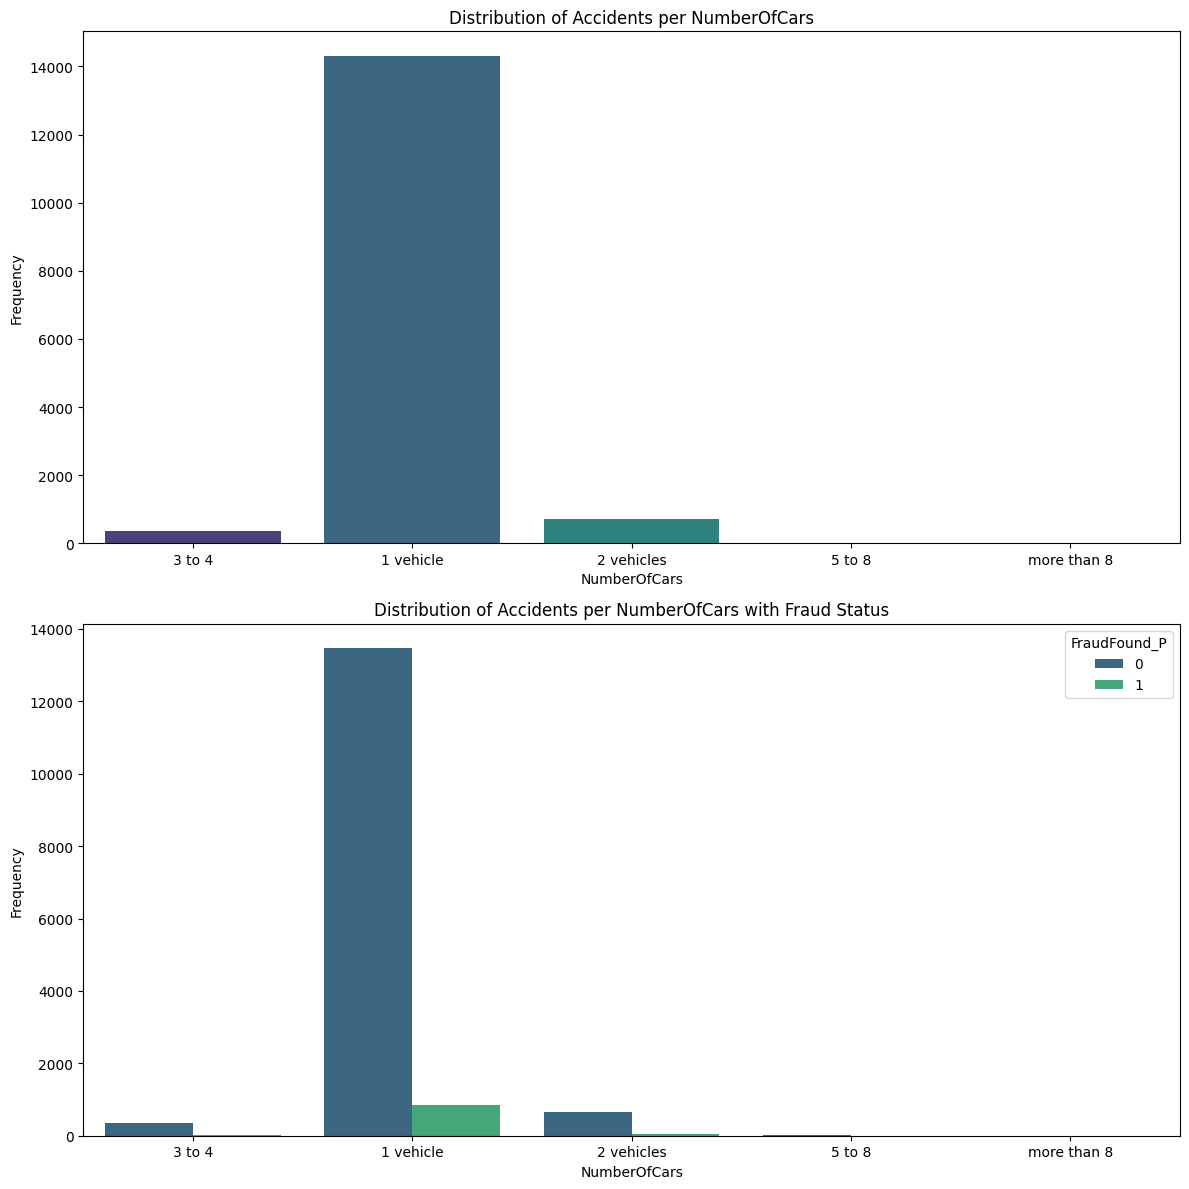

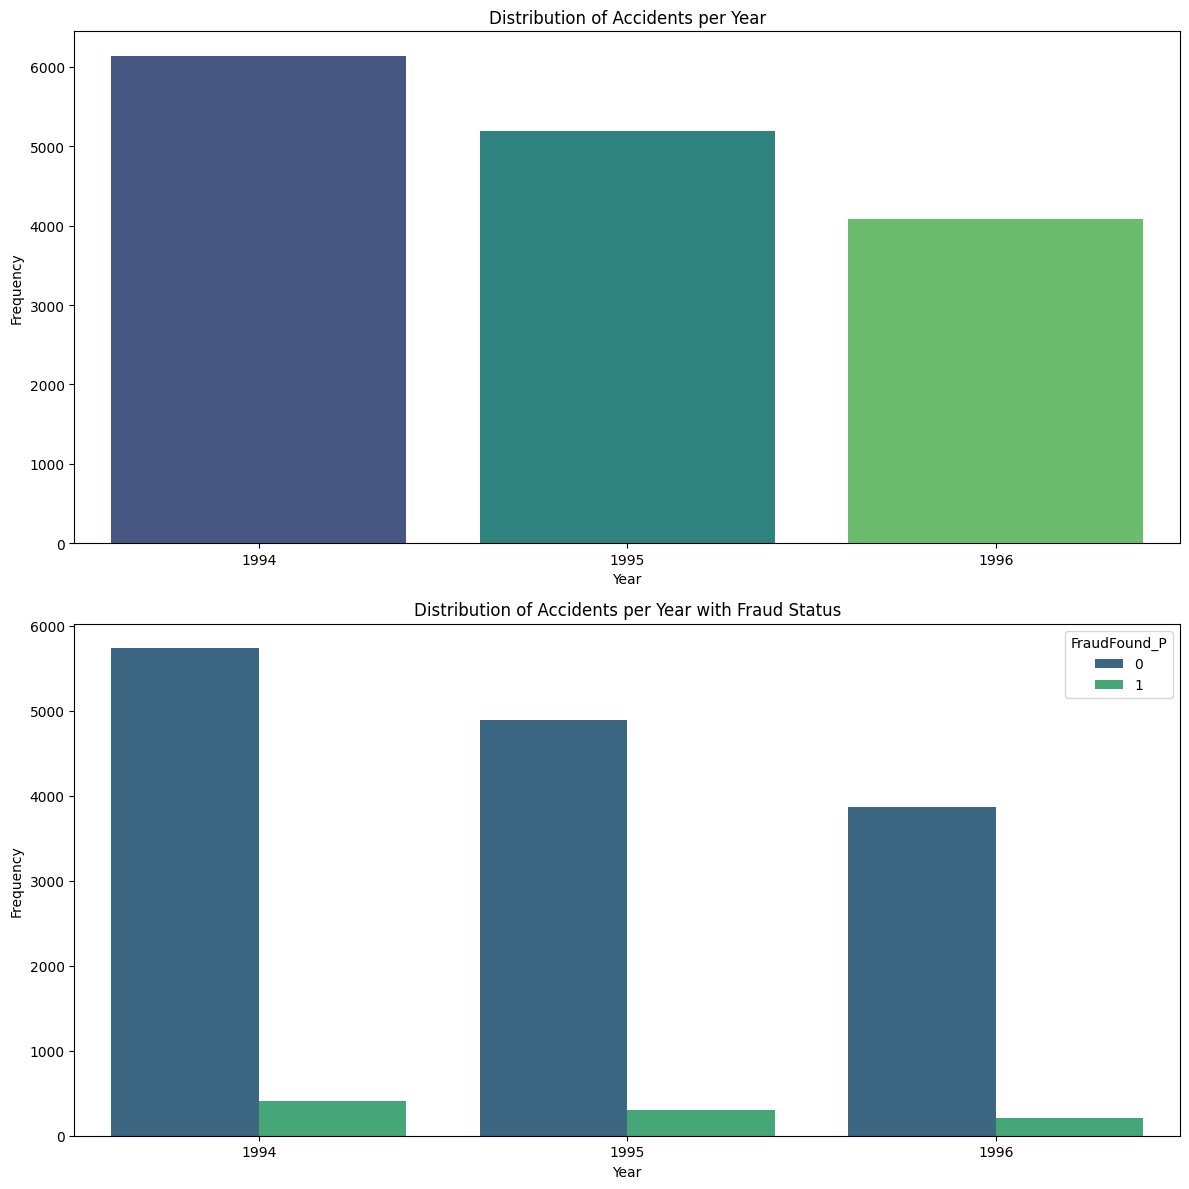

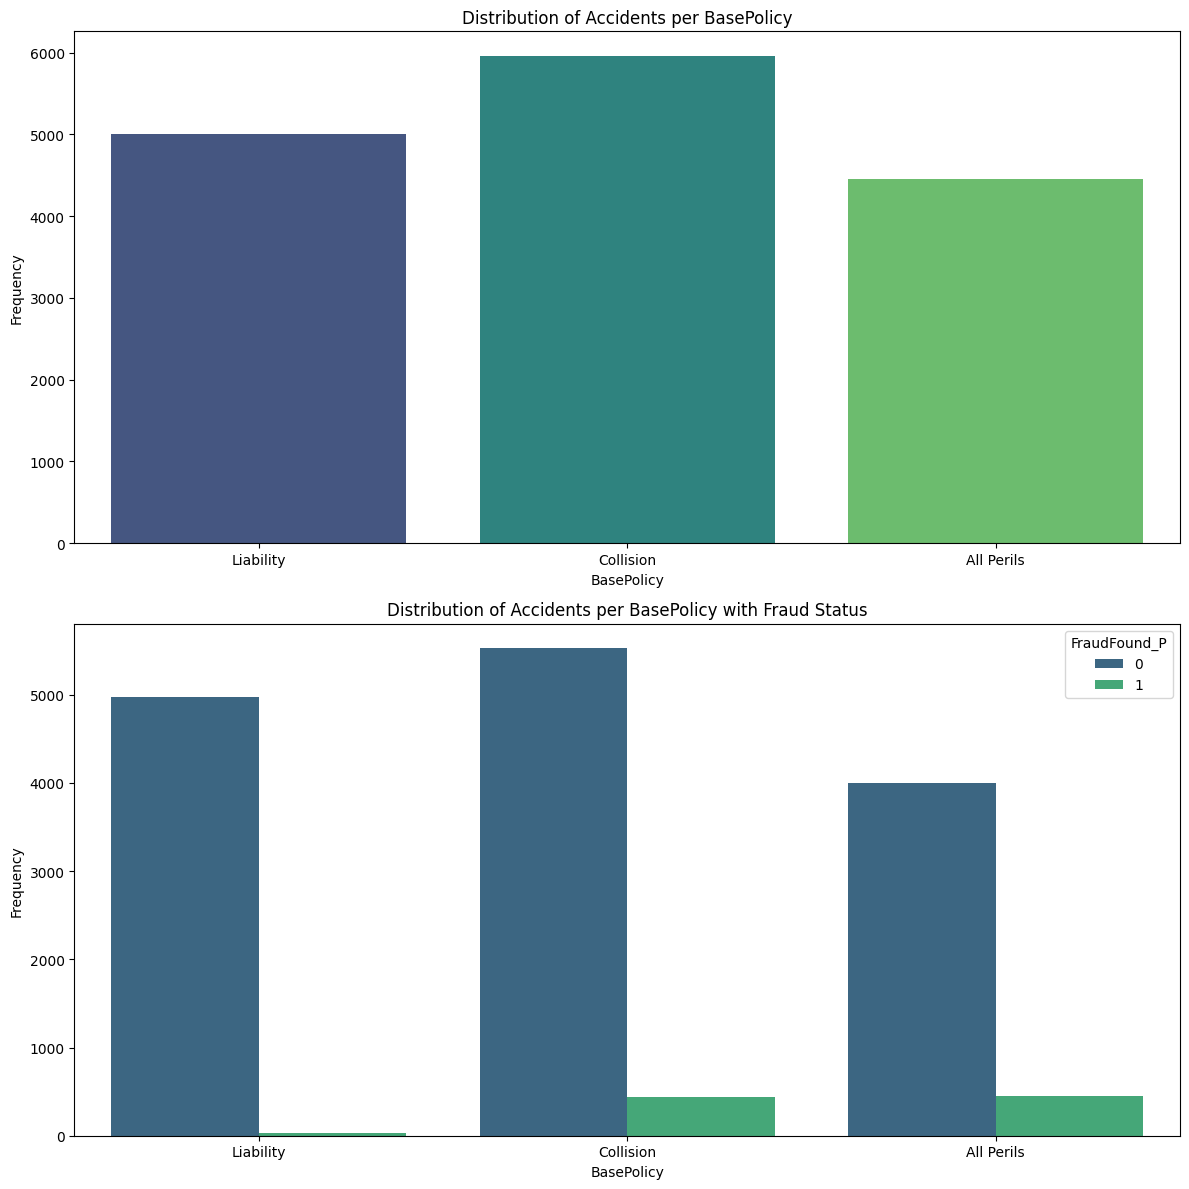

In [7]:
variables = [
    'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 
    'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory', 
    'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 
    'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 
    'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 
    'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 
    'Year', 'BasePolicy'
]

for var in variables:
    plt.figure(figsize=(12, 12))

    plt.subplot(2, 1, 1)
    sns.countplot(x=var, data=data, palette='viridis')
    plt.title(f'Distribution of Accidents per {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

    plt.subplot(2, 1, 2)
    sns.countplot(x=var, data=data, palette='viridis', hue='FraudFound_P')
    plt.title(f'Distribution of Accidents per {var} with Fraud Status')
    plt.xlabel(var)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

Notable Observations:
- Majority of claims are across seven different makes, fraud proportionally follows the trend.
- Majority of claims occur in urban areas.
- The day of week claimed was typically a weekday.
- Six times the amount of male claims vs female claims.
- Most fraudulent claims come from 26-46 year olds.
- Typically th epolicy holder is reporting the claim.
- Majority of claims involved sedans and a majority of fraud also involved sedans.
- More than half of the fraudlent claims dealt with cheaper vehicles between the price range of 20000-29000.
- Policy number does not provide anything meaningful.
- The typical deductible was 400.
- Driver rating did does not massively affect the distribution of fraud.
- Fraudlent claims either usually had no history of past claims or 2-4 past claims.
- Most claims dealt with older cars and most fraud also occured with these older cars.
- Police reports were generally not filed.
- There was not typically a witness.

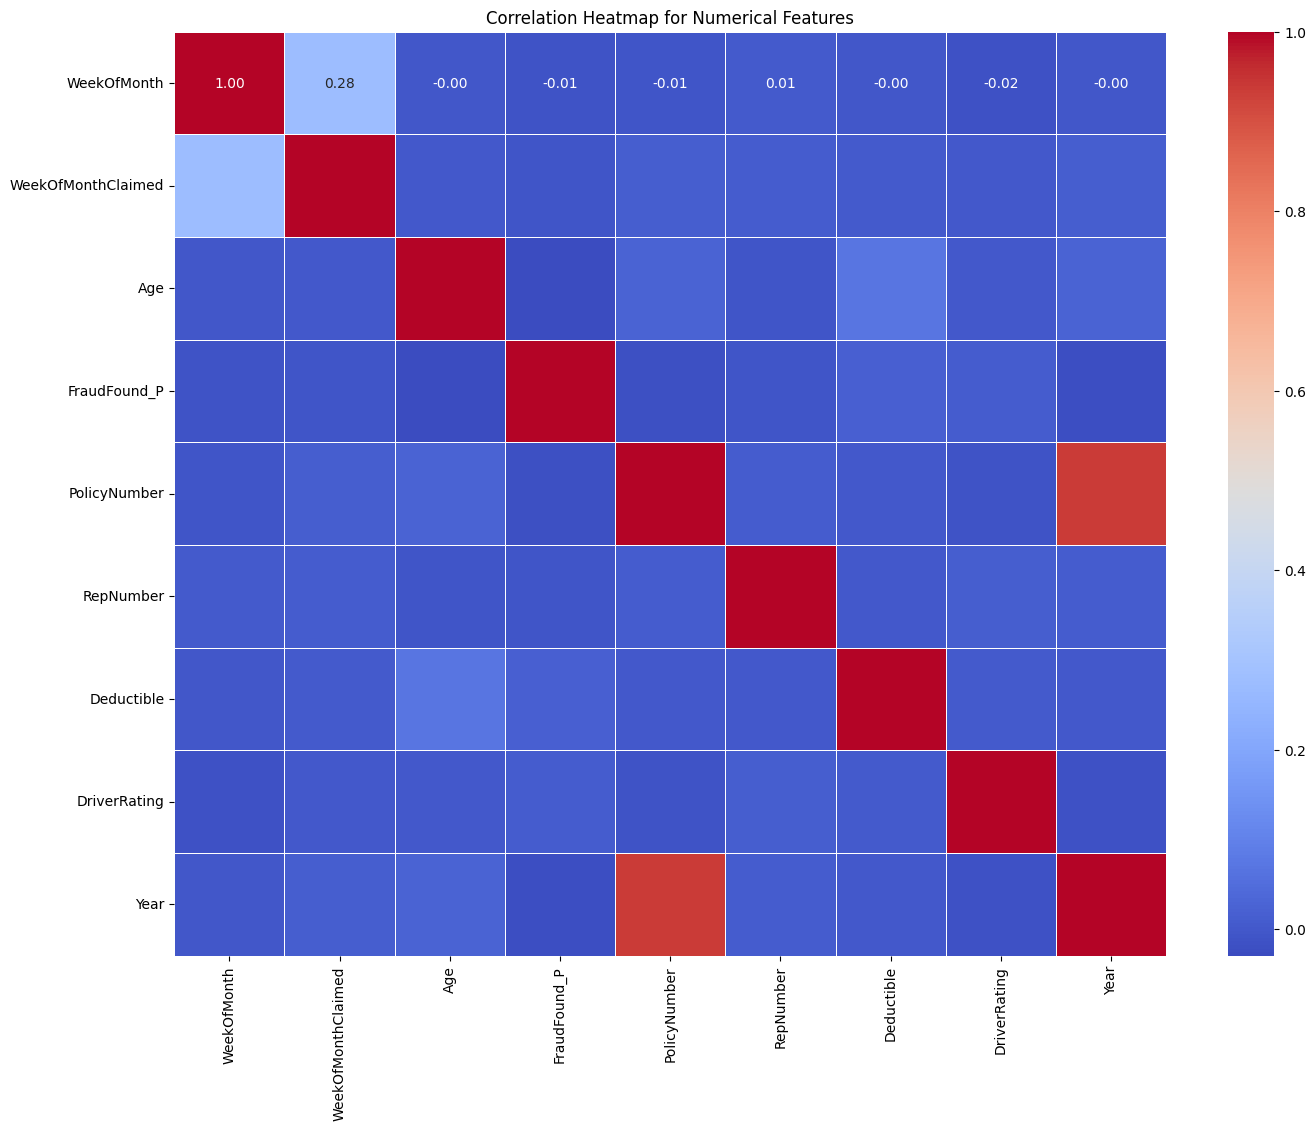

In [10]:
# Heatmap of correlations for numerical categories

import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(16, 12))
corr = data[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()